###Final_Project

---

보건분야: 기대수명과 건강 지표 분석

데이터수집:https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated#:~:text=Life%20Expectancy%20%28WHO%29%20Fixed%20,2015%20years

라이브러리 불러오기

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [ ]:
df = pd.read_excel('/content/Life-Expectancy-Data-Updated_수정.xlsx',sheet_name='시트 1')
df

###데이터 전처리

---



*   type 확인

*   결측치 확인
*   이상치 확인

*   데이터 스케일링 (Scaling)



In [158]:
df.shape

(2880, 21)

In [159]:
# type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2880 non-null   object 
 1   Region                       2880 non-null   object 
 2   Year                         2880 non-null   int64  
 3   Infant_deaths                2880 non-null   float64
 4   Under_five_deaths            2880 non-null   float64
 5   Adult_mortality              2880 non-null   float64
 6   Alcohol_consumption          2880 non-null   float64
 7   Hepatitis_B                  2880 non-null   int64  
 8   Measles                      2880 non-null   int64  
 9   BMI                          2880 non-null   float64
 10  Polio                        2880 non-null   int64  
 11  Diphtheria                   2880 non-null   int64  
 12  Incidents_HIV                2880 non-null   float64
 13  GDP_per_capita    

In [160]:
# 결측치 확인
df.isnull().sum()

,0
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0


In [161]:
df.duplicated().sum()

np.int64(0)

In [162]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [163]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,2007.500000,30.206604,42.711222,191.660318,4.847707,84.352778,77.443750,25.051111,86.554167,86.326042,0.889875,11592.323958,36.744219,4.847361,4.878264,7.659722,0.211111,0.788889,68.915417
std,4.610573,27.541980,44.549707,114.869421,3.987373,15.973467,18.656498,2.207088,15.057786,15.509757,2.375497,16906.904850,136.109178,4.432796,4.521840,3.184442,0.408168,0.408168,9.414063
min,2000.000000,1.290000,1.290000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.000000,9.500000,106.092500,1.220000,78.750000,64.000000,23.275000,81.000000,81.000000,0.080000,1419.750000,2.135000,1.600000,1.500000,5.100000,0.000000,1.000000,62.800000
50%,2007.500000,19.400000,22.850000,163.277750,4.055000,89.000000,83.000000,25.600000,93.000000,93.000000,0.150000,4256.500000,7.980000,3.300000,3.300000,7.900000,0.000000,1.000000,71.450000
75%,2011.250000,47.100000,65.725000,246.559500,7.842500,96.000000,93.000000,26.500000,97.000000,97.000000,0.452500,12896.750000,24.260000,7.200000,7.225000,10.300000,0.000000,1.000000,75.500000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [164]:
#문자형
categorical_columns = df.select_dtypes(include='object')
categorical_columns.head()

,Country,Region
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia


In [165]:
#숫자형
numerical_columns = df.select_dtypes(include='number')
numerical_columns.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,2000,90.5,129.2,310.8305,0.02,62,12,21.7,24,24,0.02,148,20.78,2.3,2.5,2.2,0,1,55.8
1,2001,87.9,125.2,304.8580,0.02,63,13,21.8,35,33,0.02,163,21.61,2.1,2.4,2.2,0,1,56.3
2,2002,85.3,121.1,298.8855,0.02,64,14,21.9,36,36,0.02,320,22.60,19.9,2.2,2.3,0,1,56.8
3,2003,82.7,116.9,292.0365,0.02,65,15,22.0,41,41,0.02,332,23.68,19.7,19.9,2.4,0,1,57.3
4,2004,80.0,112.6,285.1880,0.02,67,16,22.1,50,50,0.02,323,24.73,19.5,19.7,2.5,0,1,57.8


In [89]:
numerical_columns.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,2007.500000,30.206604,42.711222,191.660318,4.847707,84.352778,77.443750,25.051111,86.554167,86.326042,0.889875,11592.323958,36.744219,4.847361,4.878264,7.659722,0.211111,0.788889,68.920694
std,4.610573,27.541980,44.549707,114.869421,3.987373,15.973467,18.656498,2.207088,15.057786,15.509757,2.375497,16906.904850,136.109178,4.432796,4.521840,3.184442,0.408168,0.408168,9.422001
min,2000.000000,1.290000,1.290000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.000000,9.500000,106.092500,1.220000,78.750000,64.000000,23.275000,81.000000,81.000000,0.080000,1419.750000,2.135000,1.600000,1.500000,5.100000,0.000000,1.000000,62.800000
50%,2007.500000,19.400000,22.850000,163.277750,4.055000,89.000000,83.000000,25.600000,93.000000,93.000000,0.150000,4256.500000,7.980000,3.300000,3.300000,7.900000,0.000000,1.000000,71.450000
75%,2011.250000,47.100000,65.725000,246.559500,7.842500,96.000000,93.000000,26.500000,97.000000,97.000000,0.452500,12896.750000,24.260000,7.200000,7.225000,10.300000,0.000000,1.000000,75.500000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,87.000000


In [90]:
for col in df.columns:
  print(f"Column:{col},type:{df[col].dtype}")

Column:Country,type:object
Column:Region,type:object
Column:Year,type:int64
Column:Infant_deaths,type:float64
Column:Under_five_deaths,type:float64
Column:Adult_mortality,type:float64
Column:Alcohol_consumption,type:float64
Column:Hepatitis_B,type:int64
Column:Measles,type:int64
Column:BMI,type:float64
Column:Polio,type:int64
Column:Diphtheria,type:int64
Column:Incidents_HIV,type:float64
Column:GDP_per_capita,type:int64
Column:Population_mln,type:float64
Column:Thinness_ten_nineteen_years,type:float64
Column:Thinness_five_nine_years,type:float64
Column:Schooling,type:float64
Column:Economy_status_Developed,type:int64
Column:Economy_status_Developing,type:int64
Column:Life_expectancy,type:float64


In [10]:
numerical_columns.iloc[:,1:]

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,4.041630,78.53,4.9,4.8,7.8,0,1,76.5
1,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,4.410642,46.44,0.6,0.5,9.7,1,0,82.8
2,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,3.031812,1183.21,27.1,28.0,5.0,0,1,65.4
3,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,3.617629,0.75,5.7,5.5,7.9,0,1,67.0
4,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,4.531415,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,2.600973,11.33,12.8,12.9,1.1,0,1,49.9
2860,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,3.400538,2.67,2.2,2.3,9.1,0,1,66.9
2861,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,3.328380,19.39,15.4,15.5,10.3,0,1,74.3
2862,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,3.870638,3.44,3.3,3.3,11.1,1,0,71.8


<Axes: >

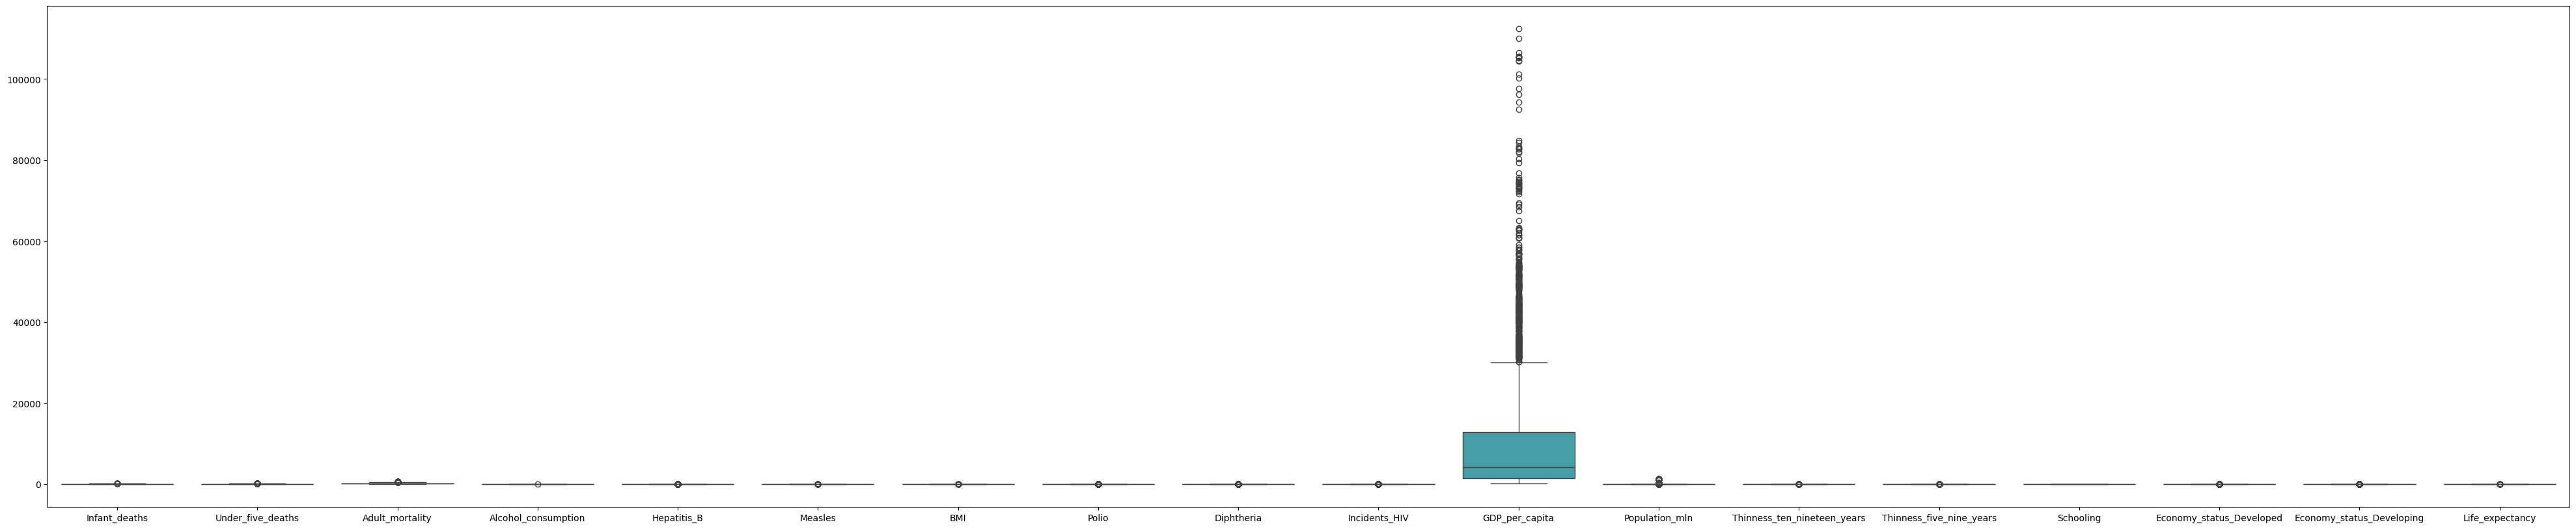

In [91]:
plt.figure(figsize=(50,10))
sns.boxplot(numerical_columns.iloc[:,1:])

<Axes: >

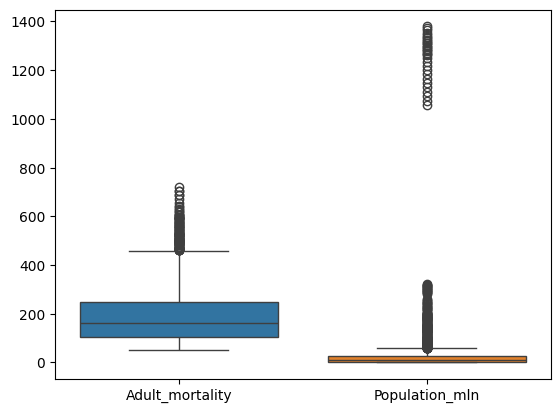

In [94]:
sns.boxplot(df[['Adult_mortality','Population_mln']])

<Axes: >

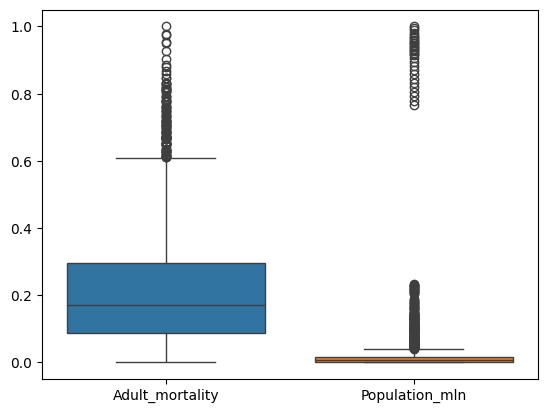

In [16]:
#데이터 스케일링 (보류)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df[['Adult_mortality','Population_mln']] = scaler.fit_transform(df[['Adult_mortality','Population_mln']])
df.head()


df[['Adult_mortality','Population_mln']].describe()

sns.boxplot(df[['Adult_mortality','Population_mln']])

In [ ]:
df.head()

In [13]:
numerical_columns = df.select_dtypes(include='number')
numerical_columns

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,4.041630,78.53,4.9,4.8,7.8,0,1,76.5
1,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,4.410642,46.44,0.6,0.5,9.7,1,0,82.8
2,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,3.031812,1183.21,27.1,28.0,5.0,0,1,65.4
3,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,3.617629,0.75,5.7,5.5,7.9,0,1,67.0
4,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,4.531415,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,2.600973,11.33,12.8,12.9,1.1,0,1,49.9
2860,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,3.400538,2.67,2.2,2.3,9.1,0,1,66.9
2861,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,3.328380,19.39,15.4,15.5,10.3,0,1,74.3
2862,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,3.870638,3.44,3.3,3.3,11.1,1,0,71.8


In [102]:
X=numerical_columns.drop('Life_expectancy',axis=1)
Y=numerical_columns['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 결과 출력
print("훈련 데이터:", X_train.shape)
print("테스트 데이터:", X_test.shape)


NameError: name 'train_test_split' is not defined

기대수명

In [ ]:
df[['Country', 'Region']]

In [166]:
#지역별 기대수명
df.groupby('Region').agg({'Life_expectancy':'mean'}).reset_index().sort_values('Life_expectancy',ascending=False)

,Region,Life_expectancy
5,North America,77.841667
3,European Union,77.715046
7,Rest of Europe,74.525417
4,Middle East,73.975446
8,South America,72.780729
2,Central America and Caribbean,72.437500
1,Asia,69.814955
6,Oceania,69.517614
0,Africa,57.847304


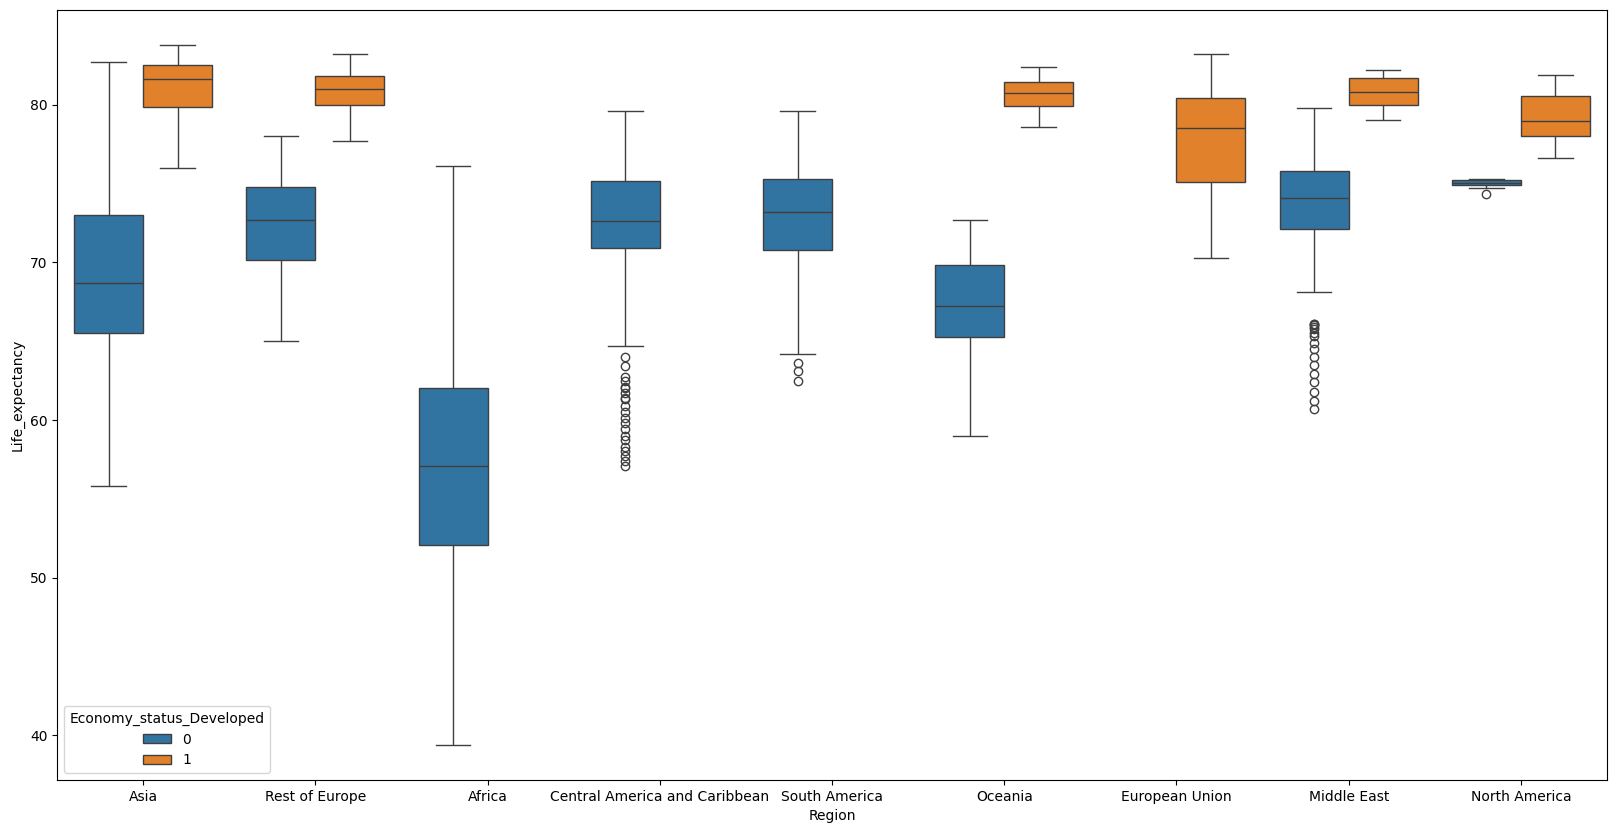

In [172]:
#시각화
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Life_expectancy',hue='Economy_status_Developed')
plt.show()

아프리카 지역이 기대수명이 현저히 낮음

In [106]:
#년도별 기대수명
df.groupby('Year').agg({'Life_expectancy':'mean'})

,Life_expectancy
Year,
2000,66.413889
2001,66.706111
2002,66.943333
2003,67.228333
2004,67.608889
2005,67.916667
2006,68.283889
2007,68.650556
2008,69.068889


시간이 경과하면서 기대수명이 올라감

<Axes: xlabel='Year', ylabel='Life_expectancy'>

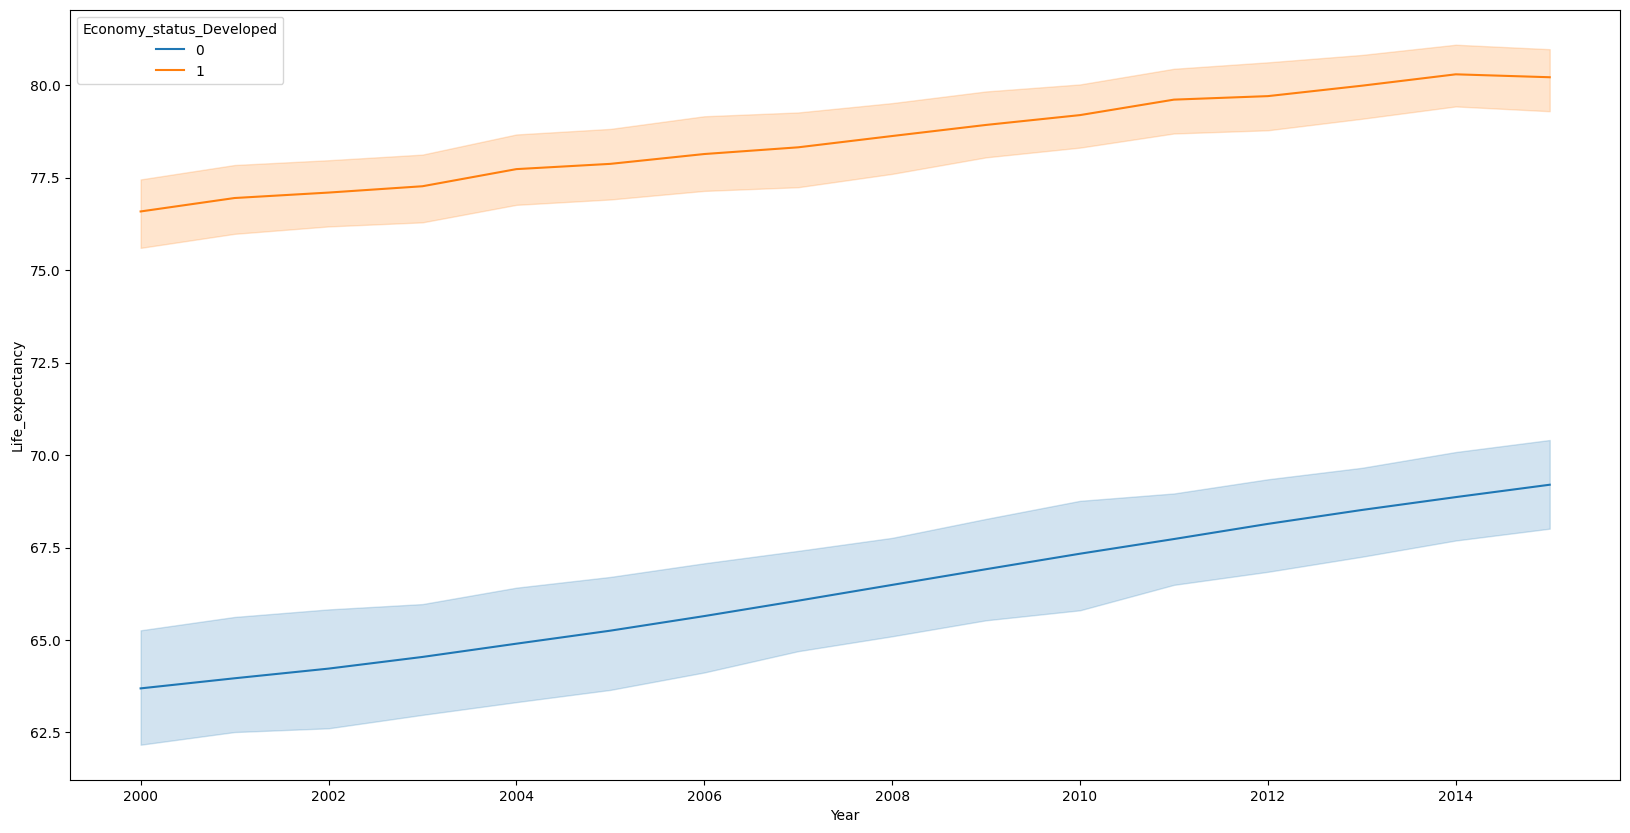

In [173]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Year',y='Life_expectancy',hue='Economy_status_Developed')

In [22]:
country_year = pd.pivot_table(df,index='Region',columns='Year',values='Life_expectancy')
country_year

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
Africa,54.137255,54.358824,54.594118,54.964706,55.450980,55.956863,56.570588,57.243137,57.933333,58.627451,59.331373,59.998039,60.701961,61.309804,61.911765,62.466667
Asia,66.648148,67.048148,67.440741,67.833333,68.233333,68.596296,68.955556,69.325926,69.711111,70.125926,70.433333,70.737037,71.088889,71.403704,71.714815,71.981481
Central America and Caribbean,70.847368,71.094737,71.310526,71.542105,71.742105,71.957895,72.157895,72.357895,72.568421,72.763158,72.952632,73.168421,73.347368,73.547368,73.726316,73.915789
European Union,75.740741,76.092593,76.237037,76.366667,76.870370,76.974074,77.251852,77.422222,77.777778,78.081481,78.400000,78.874074,78.937037,79.288889,79.614815,79.511111
Middle East,72.307143,72.600000,72.857143,73.114286,73.364286,73.585714,73.828571,73.985714,74.192857,74.378571,74.535714,74.685714,74.807143,74.978571,75.114286,75.271429
North America,76.666667,76.933333,77.100000,77.266667,77.533333,77.666667,77.766667,77.933333,77.966667,78.166667,78.266667,78.333333,78.433333,78.433333,78.500000,78.500000
Oceania,67.518182,67.809091,68.109091,68.418182,68.700000,69.018182,69.263636,69.527273,69.754545,69.990909,70.200000,70.400000,70.600000,70.818182,70.981818,71.172727
Rest of Europe,72.813333,73.080000,73.140000,73.320000,73.586667,73.726667,73.966667,74.246667,74.533333,74.793333,75.153333,75.513333,75.806667,76.053333,76.293333,76.380000
South America,70.808333,71.100000,71.383333,71.650000,71.941667,72.216667,72.475000,72.733333,72.991667,73.241667,73.483333,73.700000,73.916667,74.108333,74.275000,74.466667


연도가 지나면서 기대수명이 올라간다.

###가설

---
주제:기대수명에 영향을 미치는 요인




*   .가설(체중)
  - BMI에 따라 기대수명이 달라진다.
  -과제중 ,표준체중을 비교해 본다.
  - 저체중이 생존율을 낮게 하여 기대수명이 떨어진다.

*   가설(예방)
 - 예방접종률이 사망자 수를 떨어뜨려 기대수명에 늘어난다.
 - 예방접종률 중 강력한 관계를 띄우는 예방접종이 기대수명에 좋은 영향을 미친다.













<ipython-input-174-edfa99916838>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

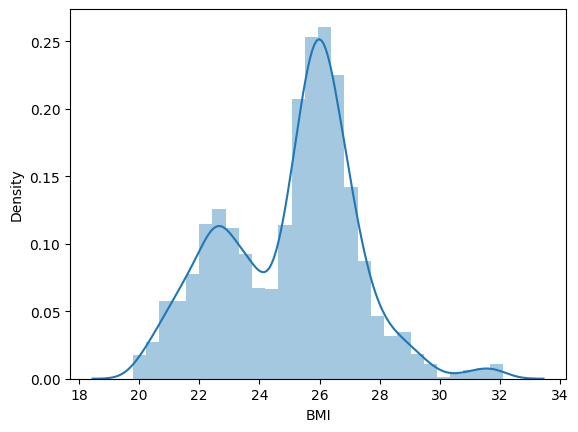

In [174]:
sns.distplot(df['BMI'])

In [175]:
print(f"MIN:{df['BMI'].min()},MAX:{df['BMI'].max()}")

MIN:19.8,MAX:32.1


In [16]:
#BMI 구간 나누기
bins=[18.5,25.0,35.0]
labels=['Normal_weight','obesity']
df['BMI_group']=pd.cut(df['BMI'],bins=bins,labels=labels)


In [17]:
df[df['BMI_group']=='Normal_weight'][['BMI_group']].value_counts()

,count
BMI_group,
Normal_weight,1174
obesity,0


In [18]:
df[df['BMI_group']=='obesity'][['BMI_group']].value_counts()

,count
BMI_group,
obesity,1690
Normal_weight,0


([<matplotlib.patches.Wedge at 0x7be9c59d3610>,
 [Text(-0.30716828703200155, 1.0562422276361736, 'obesity'),
  Text(0.3071683793716323, -1.0562422007826637, 'Normal_weight')],
 [Text(-0.16754633838109176, 0.5761321241651854, '59.0%'),
  Text(0.16754638874816305, -0.5761321095178166, '41.0%')])

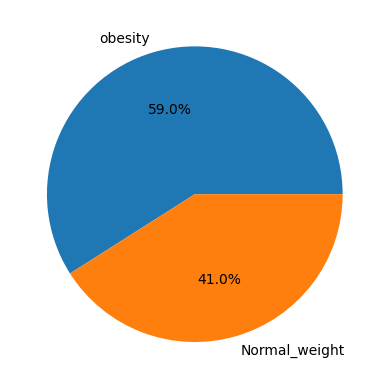

In [19]:
#시각화
plt.pie(df['BMI_group'].value_counts(),labels=df['BMI_group'].value_counts().index,autopct='%.1f%%')

BMI 수치로 비만이 더 많은 비율을 차지 한다.

In [27]:
# 가설(체중)

#BMI에 따라 기대수명이 달라진다.

df[['BMI','BMI_group','Life_expectancy']]

,BMI,BMI_group,Life_expectancy
0,27.8,obesity,76.5
1,26.0,obesity,82.8
2,21.2,Normal_weight,65.4
3,25.3,obesity,67.0
4,27.0,obesity,81.7
...,...,...,...
2859,20.8,Normal_weight,49.9
2860,25.3,obesity,66.9
2861,21.9,Normal_weight,74.3
2862,26.1,obesity,71.8


In [57]:
df.groupby('BMI_group').agg({'Life_expectancy':'mean'})

<ipython-input-57-ad6104005642>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('BMI_group').agg({'Life_expectancy':'mean'})


,Life_expectancy
BMI_group,
Normal_weight,61.587394
obesity,73.905444


In [ ]:
df[['BMI','Life_expectancy']].corr()

,BMI,Life_expectancy
BMI,1.000000,0.598423
Life_expectancy,0.598423,1.000000


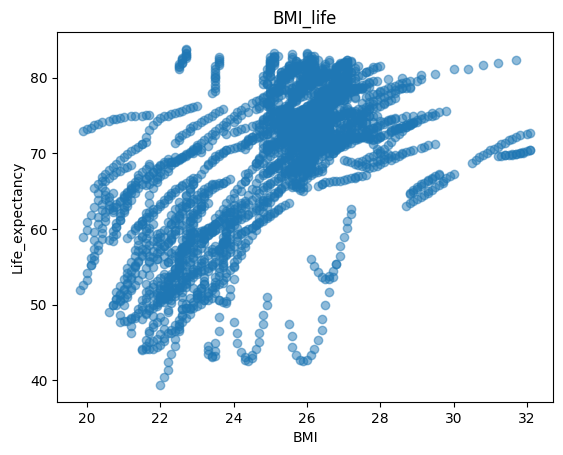

In [178]:
#시각화
x= df['BMI']
y= df['Life_expectancy']
plt.title('BMI_life')
plt.scatter(x,y,alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Life_expectancy')
plt.show()


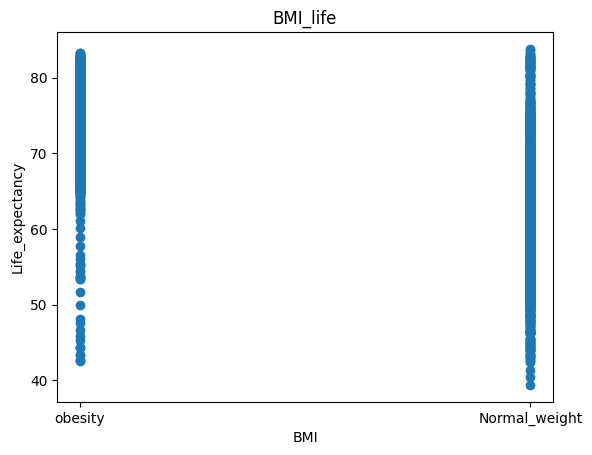

In [20]:
#시각화
x= df['BMI_group']
y= df['Life_expectancy']
plt.title('BMI_life')
plt.scatter(x,y)
plt.xlabel('BMI')
plt.ylabel('Life_expectancy')
plt.show()

<Axes: xlabel='BMI', ylabel='Life_expectancy'>

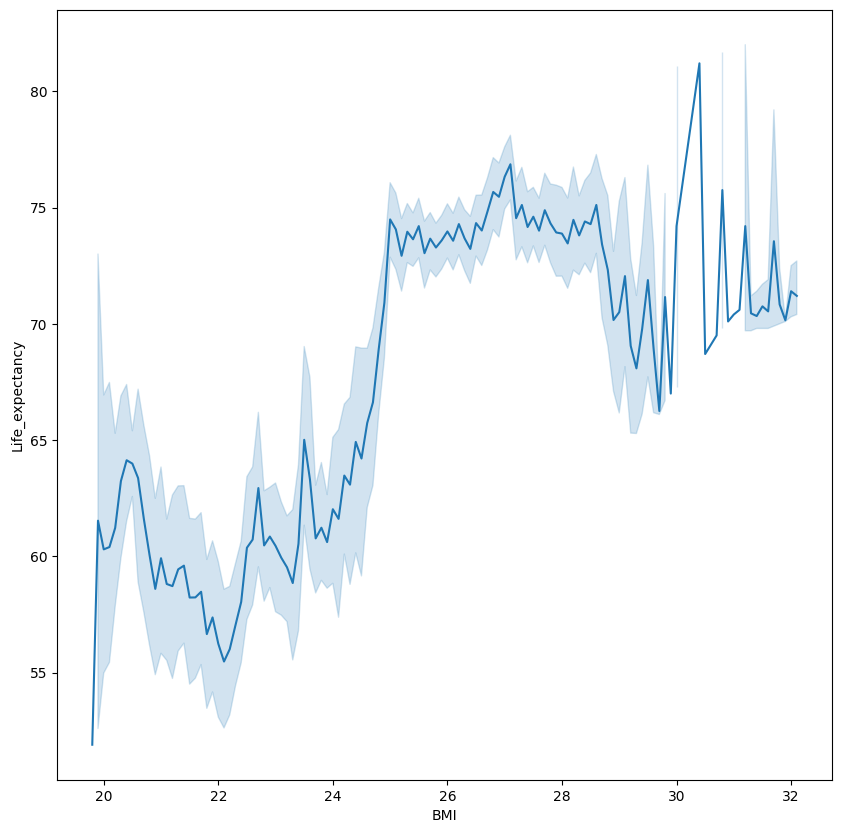

In [179]:
#선 시각화 BMI
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='BMI',y='Life_expectancy')

In [180]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['BMI'], df['Life_expectancy'])
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 ")
else:
    print("→ 귀무가설 채택 ")


검정통계량(t): -243.45090851626597 , p-value: 0.0
→ 귀무가설 기각 


LinearRegression()으로 추정한 모수
회귀계수는 2.6
절편은 4.7

Mean Squared Error is 5.7e+01


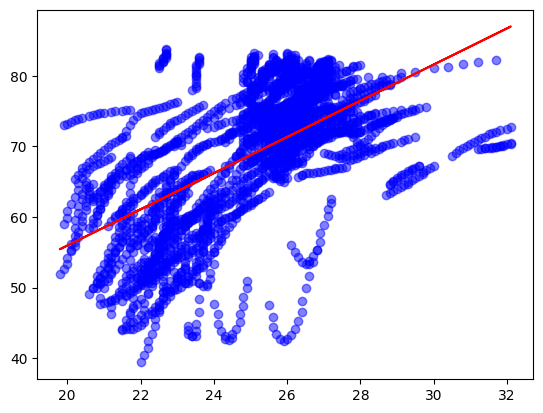

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X should be a 2D array or DataFrame
X = df[['BMI']]  # Use double brackets to select 'BMI' as a DataFrame
Y = df['Life_expectancy']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue',alpha=0.5, label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

<ipython-input-113-1fa081967a90>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Thinness_ten_nineteen_years'])


<Axes: xlabel='Thinness_ten_nineteen_years', ylabel='Density'>

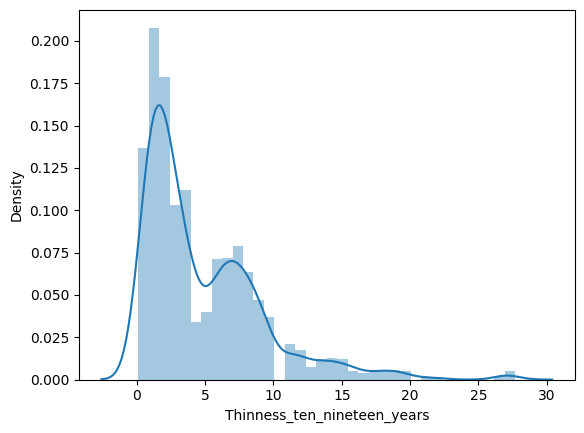

In [113]:
sns.distplot(df['Thinness_ten_nineteen_years'])

In [ ]:
# 청소년 저체중 기대수명 조사
df[['Thinness_ten_nineteen_years','Life_expectancy']]

,Thinness_ten_nineteen_years,Life_expectancy
0,4.9,76.5
1,0.6,82.8
2,27.1,65.4
3,5.7,67.0
4,1.2,81.7
...,...,...
2859,12.8,49.9
2860,2.2,66.9
2861,15.4,74.3
2862,3.3,71.8


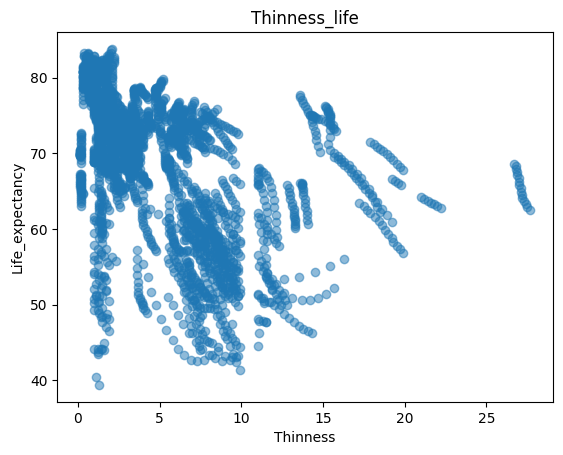

In [182]:
#시각화
x= df['Thinness_ten_nineteen_years']
y= df['Life_expectancy']
plt.title('Thinness_life')
plt.scatter(x,y,alpha=0.5)
plt.xlabel('Thinness')
plt.ylabel('Life_expectancy')
plt.show()

<Axes: xlabel='Thinness_ten_nineteen_years', ylabel='Life_expectancy'>

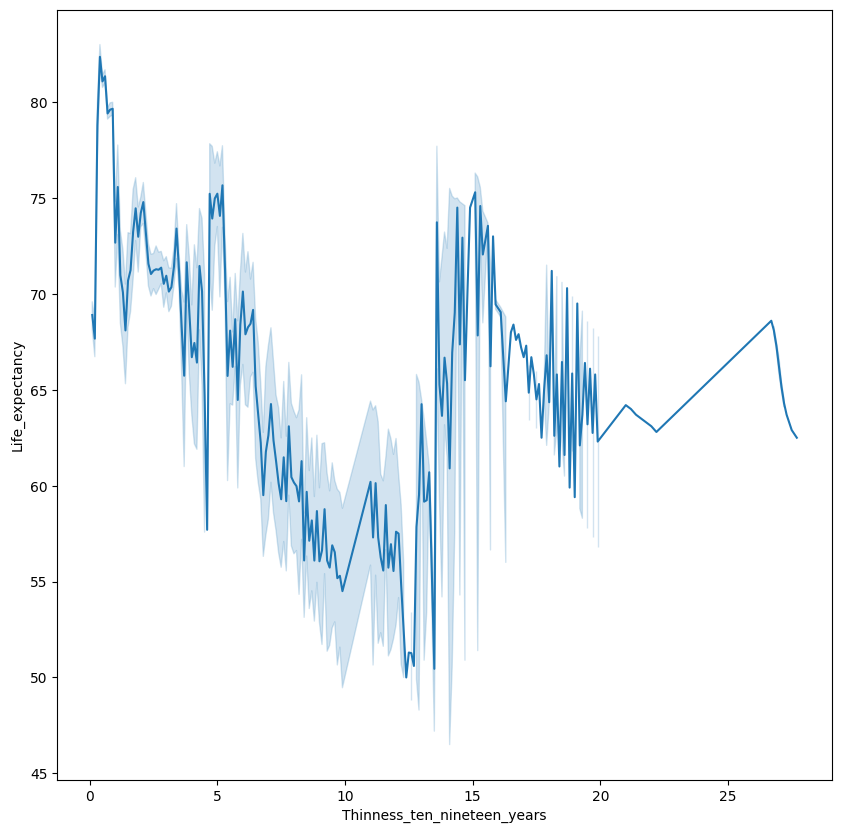

In [115]:
#선 시각화 청소년 저체중
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='Thinness_ten_nineteen_years',y='Life_expectancy')

In [116]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Thinness_ten_nineteen_years'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -330.2260071290789 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


LinearRegression()으로 추정한 모수
회귀계수는 -0.99
절편은 7.4e+01

Mean Squared Error is 6.9e+01


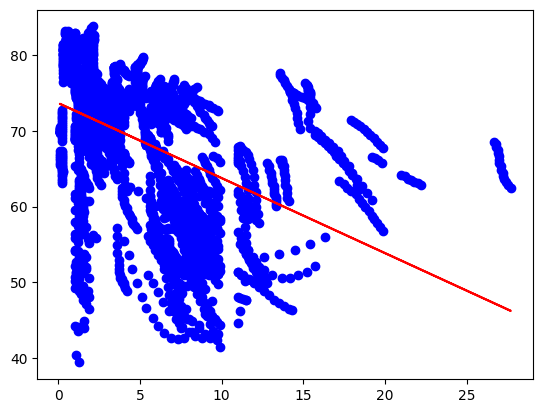

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X should be a 2D array or DataFrame
X = df[['Thinness_ten_nineteen_years']]  # Use double brackets to select 'BMI' as a DataFrame
Y = df['Life_expectancy']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue', label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

저체중 비율이 많이질수록 기대수명이 줄어든다.

In [117]:
#5~9세 저체중율
df[['Thinness_five_nine_years','Life_expectancy']].head()

,Thinness_five_nine_years,Life_expectancy
0,2.5,55.8
1,2.4,56.3
2,2.2,56.8
3,19.9,57.3
4,19.7,57.8


<ipython-input-118-d934075d1387>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Thinness_five_nine_years'])


<Axes: xlabel='Thinness_five_nine_years', ylabel='Density'>

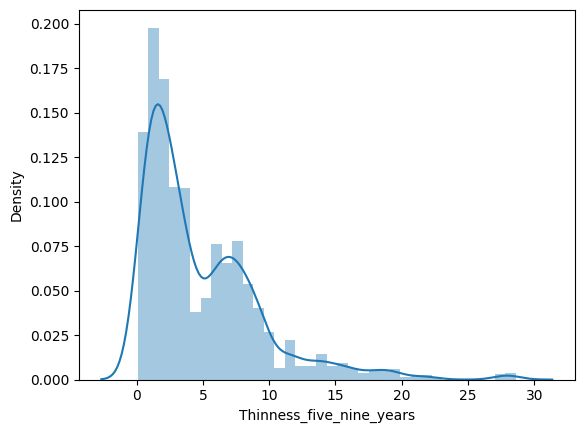

In [118]:
sns.distplot(df['Thinness_five_nine_years'])

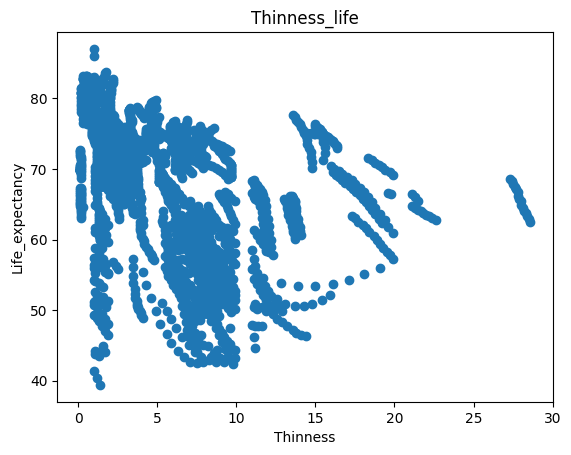

In [123]:
#시각화
x= df['Thinness_five_nine_years']
y= df['Life_expectancy']
plt.title('Thinness_life')
plt.scatter(x,y)
plt.xlabel('Thinness')
plt.ylabel('Life_expectancy')
plt.show()

In [122]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(df['Thinness_five_nine_years'],df['Life_expectancy'] )
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -328.85972904676817 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


LinearRegression()으로 추정한 모수
회귀계수는 -1.0
절편은 7.4e+01

Mean Squared Error is 6.9e+01


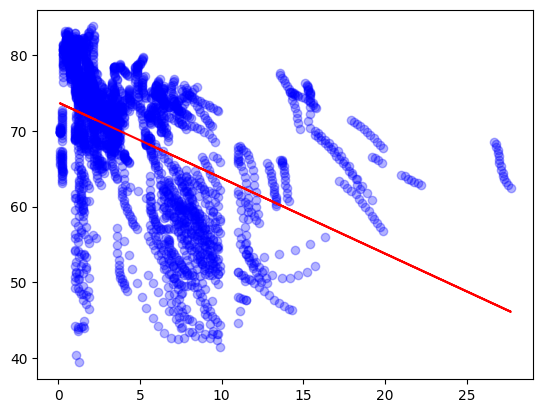

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X should be a 2D array or DataFrame
X = df[['Thinness_ten_nineteen_years']]  # Use double brackets to select 'BMI' as a DataFrame
Y = df['Life_expectancy']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue',alpha=0.3, label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

가설(예방)

---


예방접종률이 사망자 수를 떨어뜨려 기대수명에 늘어난다.

In [124]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [ ]:
df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']]

,Polio,Diphtheria,Hepatitis_B,Life_expectancy
0,97,97,97,76.5
1,97,97,97,82.8
2,67,64,60,65.4
3,92,93,93,67.0
4,94,94,97,81.7
...,...,...,...,...
2859,41,34,72,49.9
2860,96,95,97,66.9
2861,97,97,62,74.3
2862,97,95,94,71.8


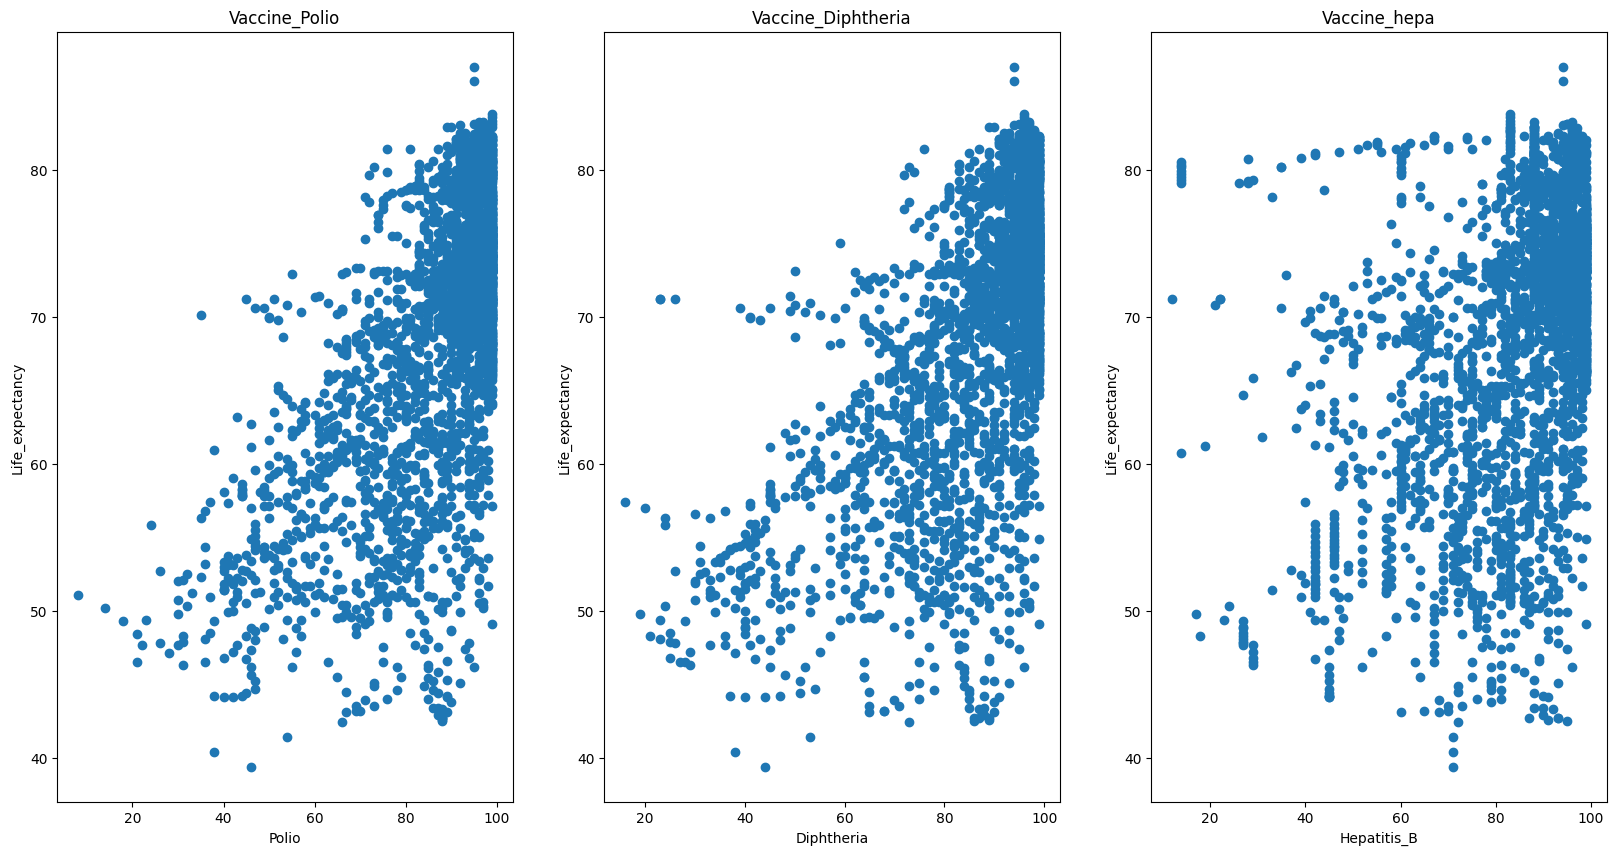

In [125]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title('Vaccine_Polio')
plt.scatter(df['Polio'],df['Life_expectancy'])
plt.xlabel('Polio')
plt.ylabel('Life_expectancy')

plt.subplot(1,3,2)
plt.title('Vaccine_Diphtheria')
plt.scatter(df['Diphtheria'],df['Life_expectancy'])
plt.xlabel('Diphtheria')
plt.ylabel('Life_expectancy')

plt.subplot(1,3,3)
plt.title('Vaccine_hepa')
plt.scatter(df['Hepatitis_B'],df['Life_expectancy'])
plt.xlabel('Hepatitis_B')
plt.ylabel('Life_expectancy')

plt.show()

In [126]:
vaccine = df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']]

vaccine.corr()['Life_expectancy']

,Life_expectancy
Polio,0.641893
Diphtheria,0.628238
Hepatitis_B,0.420094
Life_expectancy,1.000000


예방접종 Polio에 상관관계를 보여줌

<Axes: >

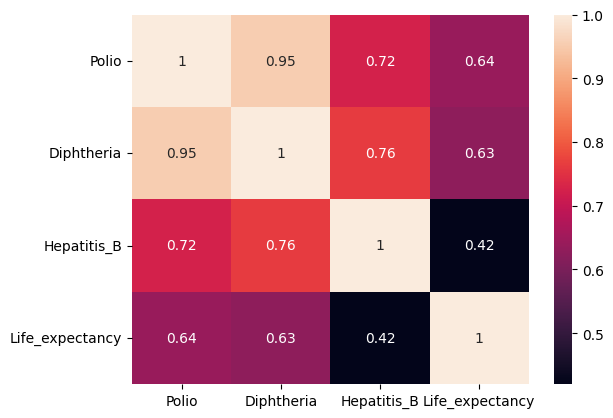

In [127]:
#시각화
sns.heatmap(vaccine.corr(),annot=True)

In [129]:
from scipy.stats import f_oneway

# 일원분산분석
f_stat, p_value = f_oneway(df['Polio'],df['Diphtheria'],df['Hepatitis_B'],df['Life_expectancy'])


print("검정통계량(t):", f_stat, ", p-value:", p_value)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")



검정통계량(t): 1018.7105598886709 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#다중회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= df[['Polio','Diphtheria','Hepatitis_B']]
Y= df['Life_expectancy']

#다중회귀모형 적합
model = LinearRegression()
model.fit(X,Y)

# 회귀계수와 절편 출력
print('회귀계수는',end=' ')
for feature, coef in zip(X.columns,model.coef_):
    print(f'{feature}:{coef:.2}',end=' ')
print(f'\n절편은 {model.intercept_:.2}')

#모형 성능 평가
y_pred = model.predict(X)
mse = mean_squared_error(Y,y_pred)
print(f'\nMean Squared Error is {mse:.2}\n')



회귀계수는 Polio:0.29 Diphtheria:0.18 Hepatitis_B:-0.083 
절편은 3.6e+01

Mean Squared Error is 5.1e+01



연도별 예방접종률

In [130]:
df.groupby('Year').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean','Life_expectancy':'mean'})

,Polio,Diphtheria,Hepatitis_B,Life_expectancy
Year,,,,
2000,82.077778,81.683333,78.911111,66.413889
2001,82.622222,82.261111,79.677778,66.706111
2002,83.688889,82.738889,80.027778,66.943333
2003,84.238889,83.650000,81.061111,67.228333
2004,84.600000,84.461111,82.222222,67.608889
2005,86.155556,86.016667,83.361111,67.916667
2006,86.500000,86.322222,84.527778,68.283889
2007,87.316667,87.327778,85.183333,68.650556
2008,87.977778,87.511111,85.494444,69.068889


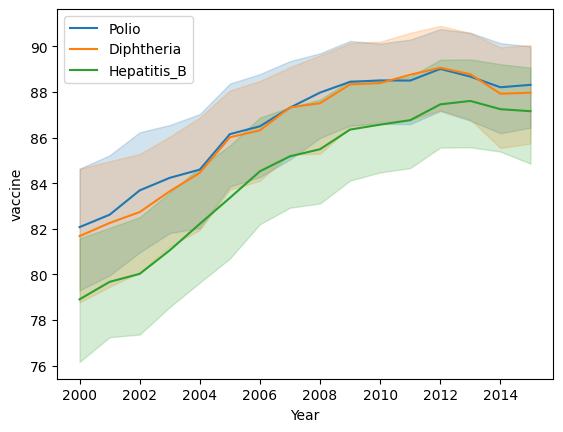

In [131]:
sns.lineplot(data=df,x='Year',y='Polio',label='Polio')
sns.lineplot(data=df,x='Year',y='Diphtheria',label='Diphtheria')
sns.lineplot(data=df,x='Year',y='Hepatitis_B',label='Hepatitis_B')
plt.ylabel('vaccine')
plt.show()

국가별 예방접종률

In [132]:
df.groupby('Region').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean','Life_expectancy':'mean'}).reset_index().sort_values(by='Life_expectancy',ascending=False)

,Region,Polio,Diphtheria,Hepatitis_B,Life_expectancy
5,North America,92.854167,93.729167,73.291667,77.841667
3,European Union,95.530093,95.678241,89.208333,77.715046
7,Rest of Europe,92.954167,92.341667,87.366667,74.525417
4,Middle East,90.022321,89.616071,88.415179,73.975446
8,South America,89.427083,89.625000,88.036458,72.780729
2,Central America and Caribbean,91.049342,90.878289,89.980263,72.437500
1,Asia,88.484375,88.232143,84.785714,69.848884
6,Oceania,81.829545,80.556818,80.664773,69.517614
0,Africa,76.205882,75.992647,78.025735,57.847304


<Axes: xlabel='Region', ylabel='Polio'>

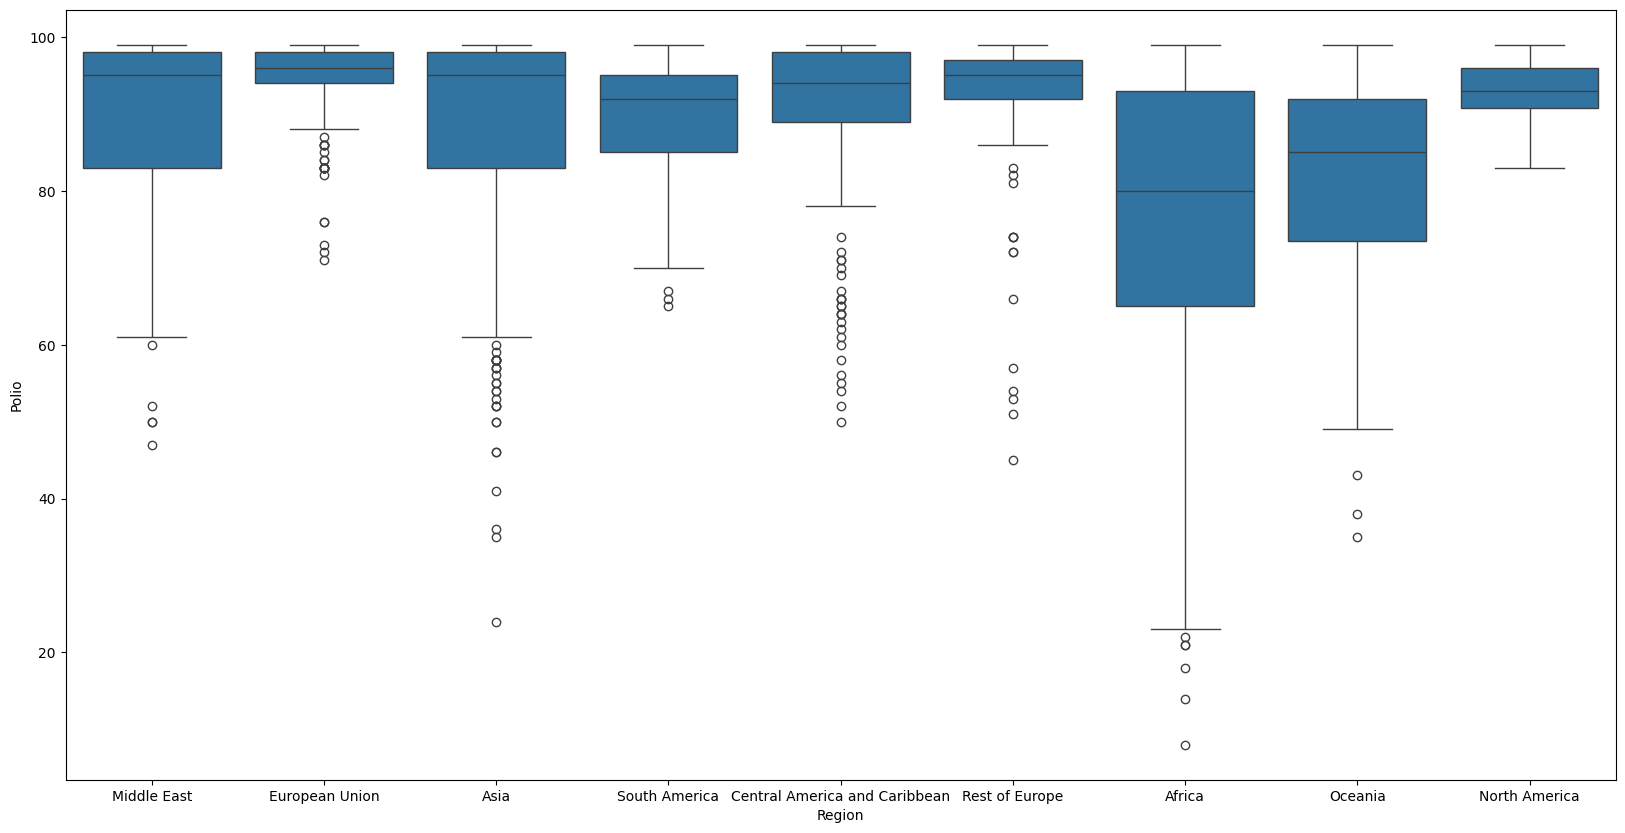

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Polio')

<Axes: xlabel='Region', ylabel='Diphtheria'>

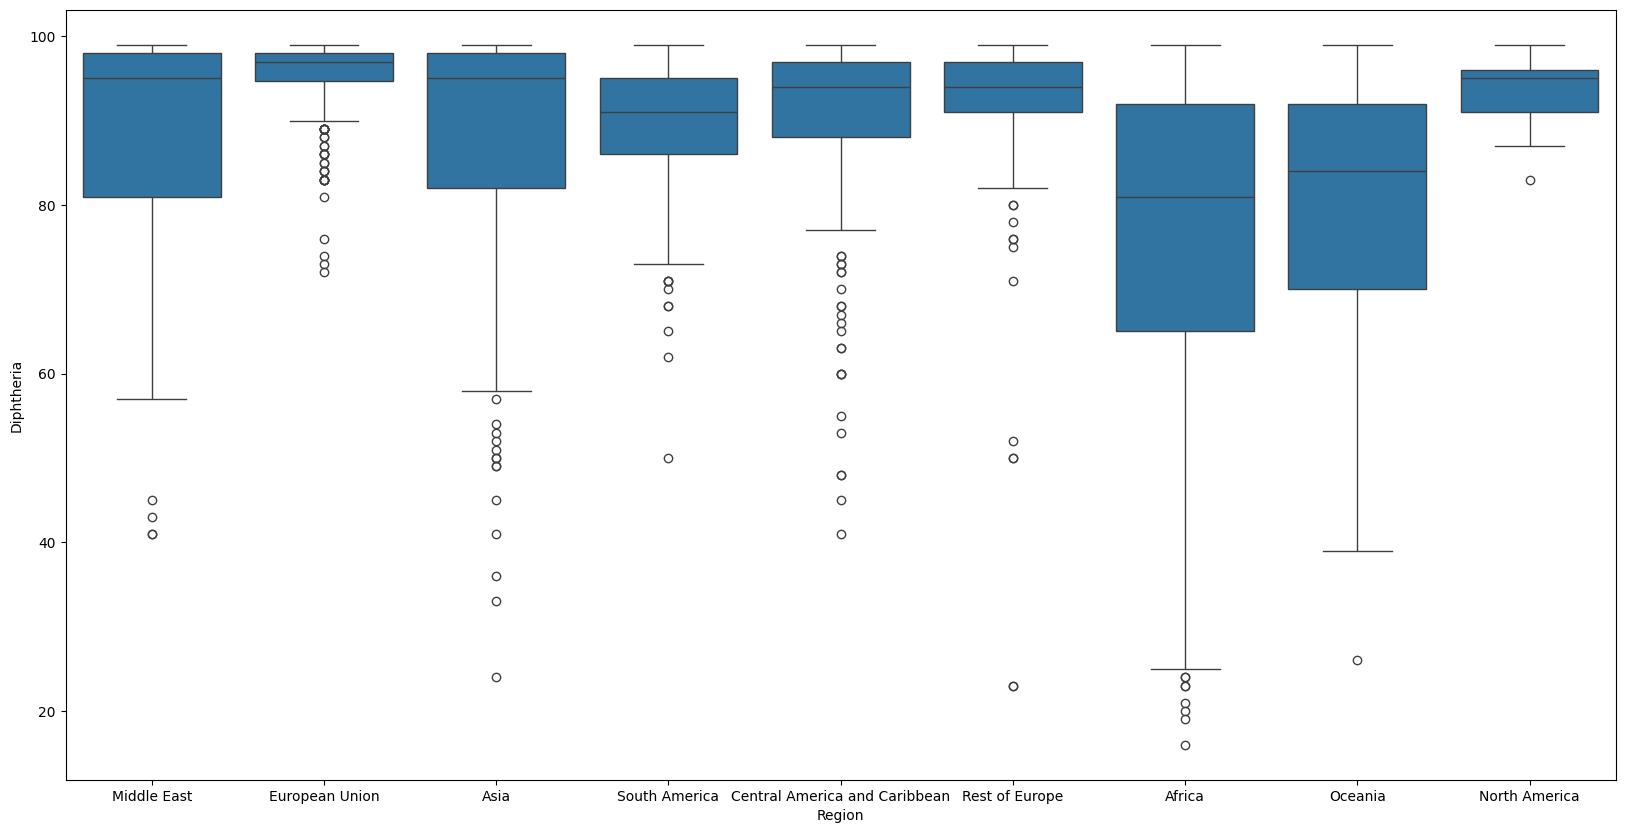

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Diphtheria')

<Axes: xlabel='Region', ylabel='Hepatitis_B'>

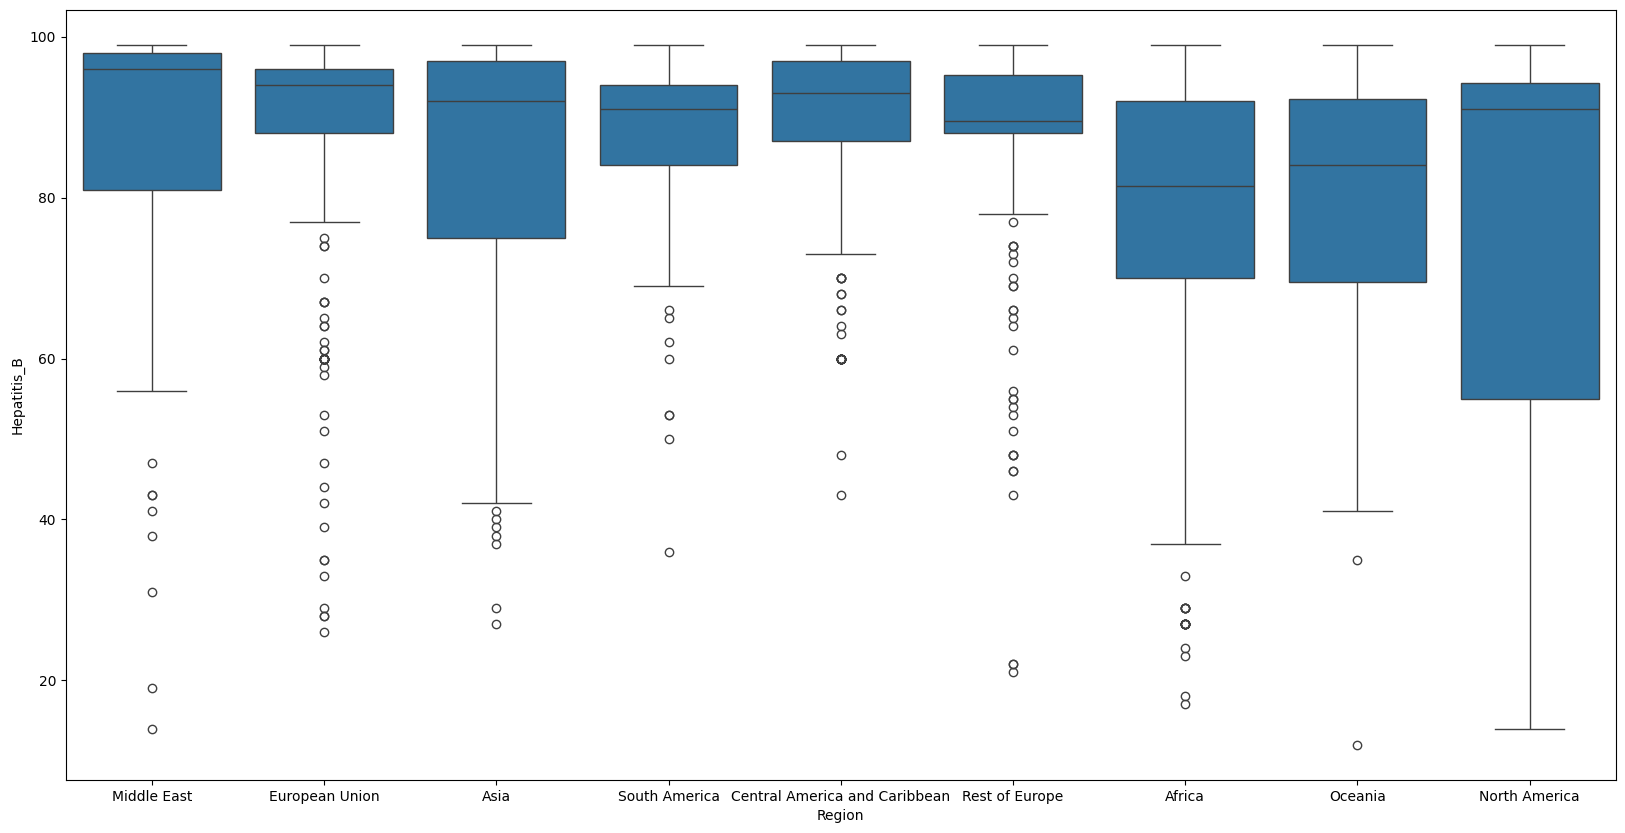

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Hepatitis_B')

In [149]:
#지역 나라별 기대수명

df.groupby(['Country','Year'])['Life_expectancy'].mean()

Country      Year
Afghanistan  2000    55.8
             2001    56.3
             2002    56.8
             2003    57.3
             2004    57.8
                     ... 
Zimbabwe     2011    52.9
             2012    55.0
             2013    56.9
             2014    58.4
             2015    59.5
Name: Life_expectancy, Length: 2880, dtype: float64

###EDA

기대수명에 영향을 미치는 요인

---



예방접종

*   나라별
*   연도별
* 개발도상국

사망자 수


*   연도별
*   국가별




In [23]:
df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']]

,Polio,Diphtheria,Hepatitis_B,Life_expectancy
0,97,97,97,76.5
1,97,97,97,82.8
2,67,64,60,65.4
3,92,93,93,67.0
4,94,94,97,81.7
...,...,...,...,...
2859,41,34,72,49.9
2860,96,95,97,66.9
2861,97,97,62,74.3
2862,97,95,94,71.8


In [24]:
df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']].corr()['Life_expectancy']

,Life_expectancy
Polio,0.641217
Diphtheria,0.627541
Hepatitis_B,0.417804
Life_expectancy,1.000000


<Axes: >

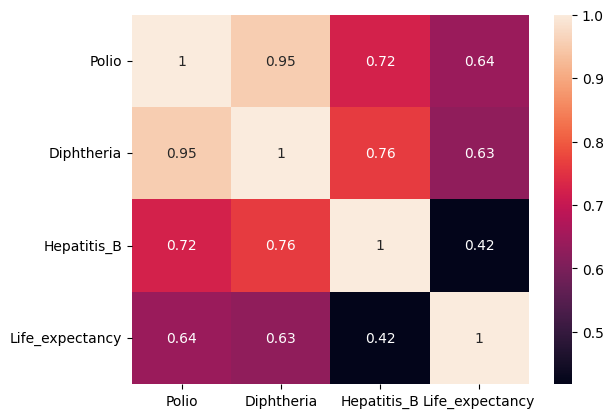

In [32]:
sns.heatmap(df[['Polio','Diphtheria','Hepatitis_B','Life_expectancy']].corr(),annot=True)

In [31]:
df.groupby('Region').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Region,,,
Africa,76.205882,75.992647,78.025735
Asia,88.194444,87.942130,84.402778
Central America and Caribbean,91.049342,90.878289,89.980263
European Union,95.530093,95.678241,89.208333
Middle East,90.022321,89.616071,88.415179
North America,92.854167,93.729167,73.291667
Oceania,81.829545,80.556818,80.664773
Rest of Europe,92.954167,92.341667,87.366667
South America,89.427083,89.625000,88.036458


<Axes: title={'center': 'Polio'}, xlabel='Region', ylabel='Polio'>

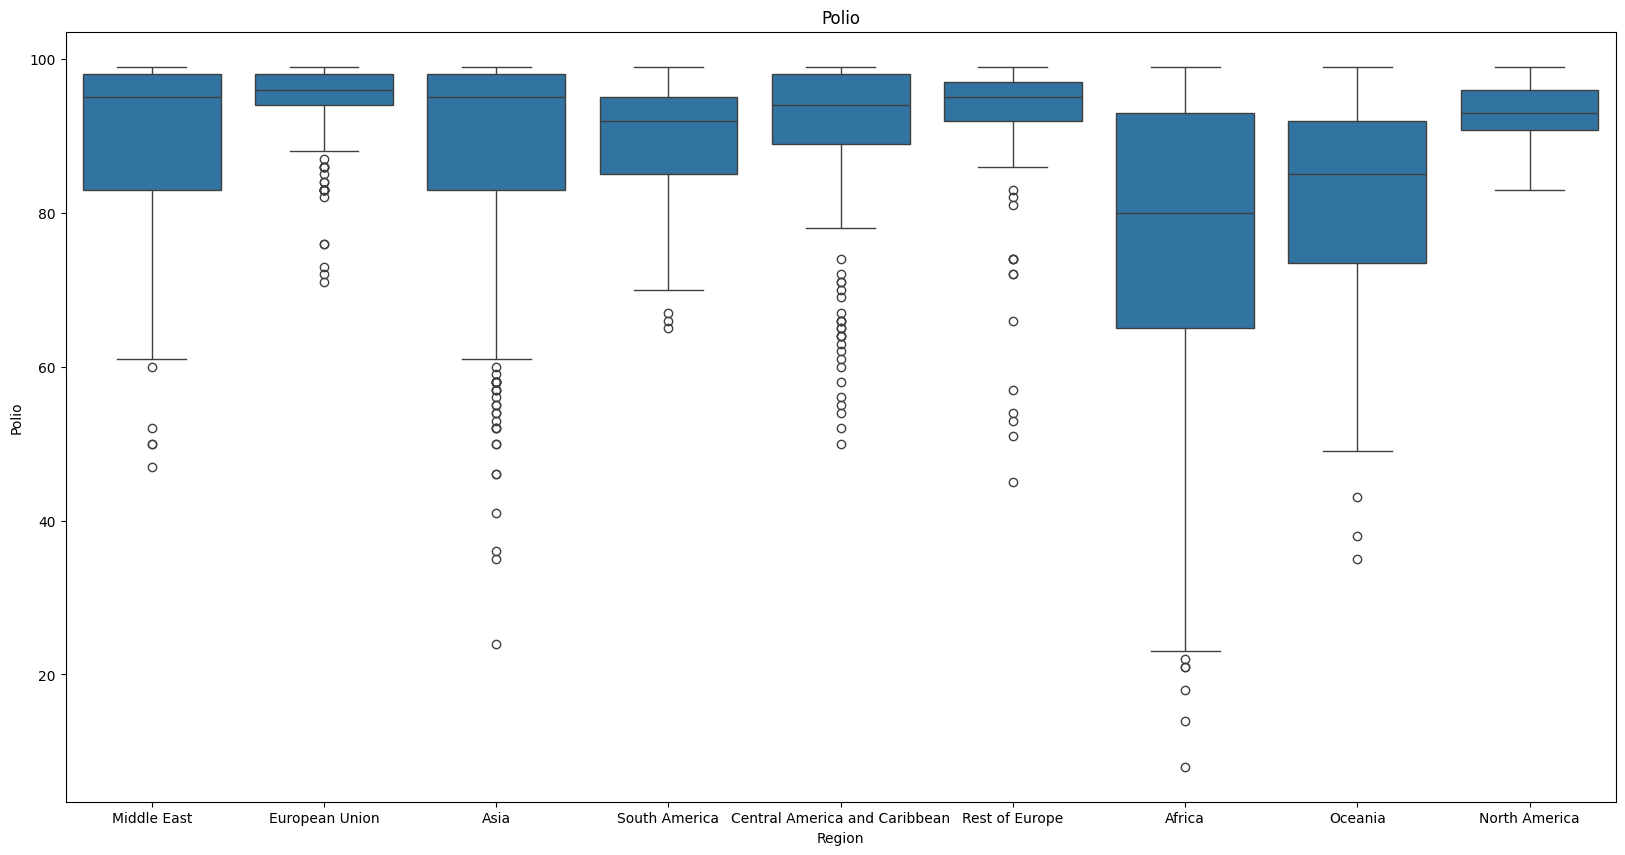

In [23]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Polio")
sns.boxplot(data=df[['Country','Region','Polio']],x='Region',y='Polio')

<Axes: title={'center': 'Diphtheria'}, xlabel='Region', ylabel='Diphtheria'>

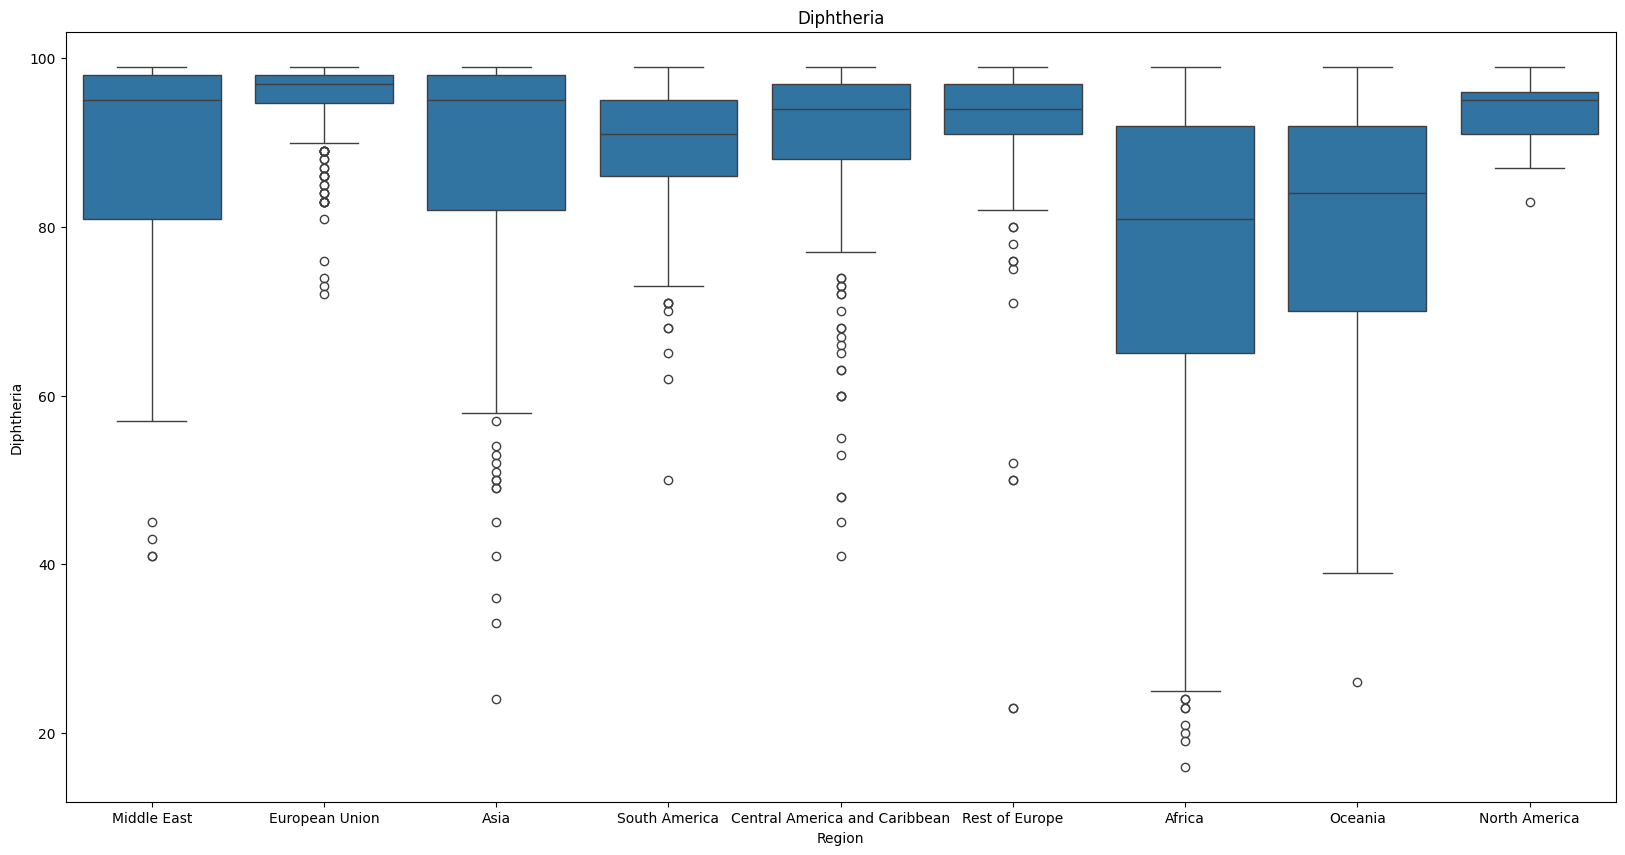

In [22]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Diphtheria")
sns.boxplot(data=df[['Country','Region','Diphtheria']],x='Region',y='Diphtheria')

<Axes: title={'center': 'Hepatitis_B'}, xlabel='Region', ylabel='Hepatitis_B'>

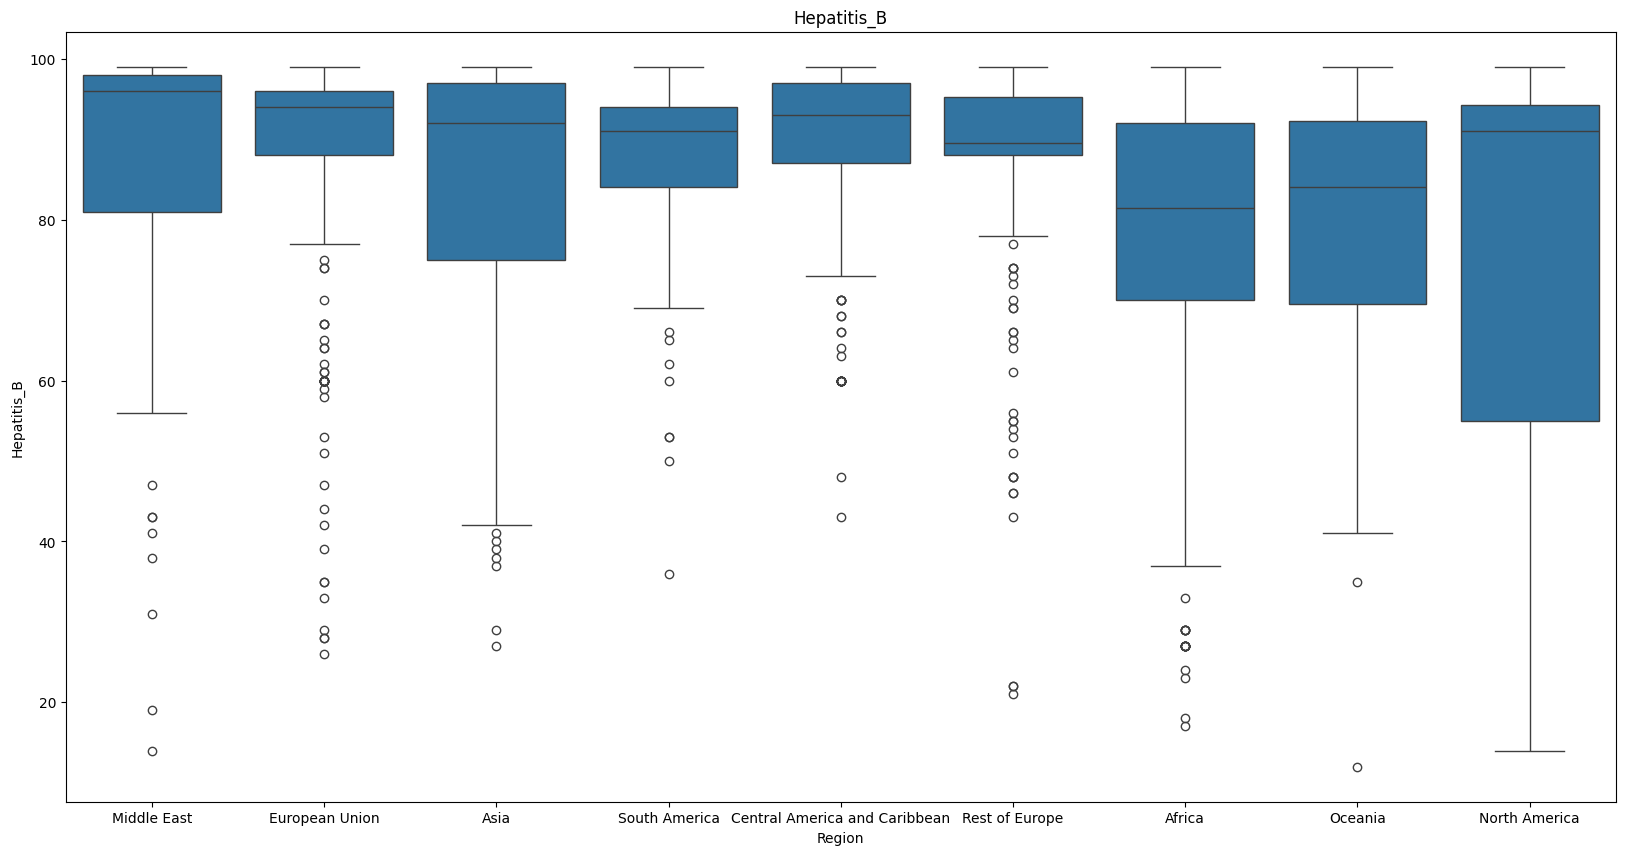

In [32]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Hepatitis_B")
sns.boxplot(data=df[['Country','Region','Hepatitis_B']],x='Region',y='Hepatitis_B')

아프리카 지역의 예방접종이 낮음

연도별 예방접종률 조사

In [24]:
df.groupby('Year').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Year,,,
2000,81.983240,81.597765,78.832402
2001,82.530726,82.178771,79.625698
2002,83.603352,82.659218,79.960894
2003,84.184358,83.575419,81.005587
2004,84.569832,84.441341,82.167598
2005,86.100559,85.960894,83.273743
2006,86.435754,86.256983,84.446927
2007,87.296089,87.307263,85.150838
2008,87.955307,87.474860,85.446927


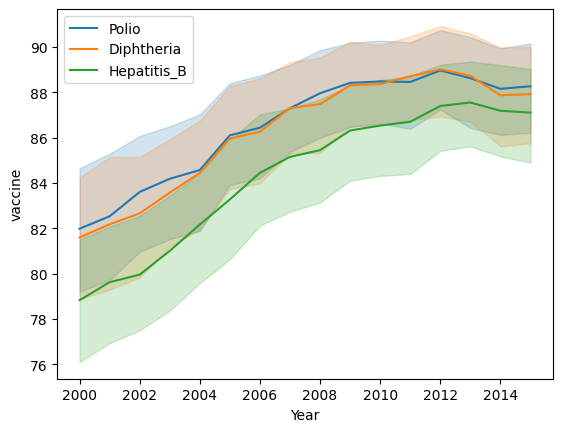

In [30]:
sns.lineplot(data=df,x='Year',y='Polio',label='Polio')
sns.lineplot(data=df,x='Year',y='Diphtheria',label='Diphtheria')
sns.lineplot(data=df,x='Year',y='Hepatitis_B',label='Hepatitis_B')
plt.ylabel('vaccine')
plt.show()

예방접종: Polio > Diphtheria > Hepatitis_B 예방접종을 하는 것 같음

In [53]:
df.groupby(['Year','Region']).agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

Polio  Diphtheria  Hepatitis_B
Year Region                                                           
2000 Africa                         65.431373   64.686275    72.960784
     Asia                           83.925926   82.851852    76.296296
     Central America and Caribbean  86.894737   87.631579    87.842105
     European Union                 94.629630   94.481481    82.629630
     Middle East                    90.500000   89.428571    83.500000
...                                       ...         ...          ...
2015 Middle East                    89.000000   87.857143    87.785714
     North America                  90.333333   91.000000    76.333333
     Oceania                        81.818182   80.818182    80.545455
     Rest of Europe                 90.000000   88.666667    86.333333
     South America                  91.166667   91.916667    92.000000

[144 rows x 3 columns]

선진국 예방접종

([<matplotlib.patches.Wedge at 0x7a911ddf5b10>,
 [Text(-0.876105143379666, 0.665161467422531, '0'),
  Text(0.8761053601167362, -0.6651611819512051, '1')],
 [Text(-0.4778755327525451, 0.36281534586683506, '79.3%'),
  Text(0.4778756509727652, -0.36281519015520275, '20.7%')])

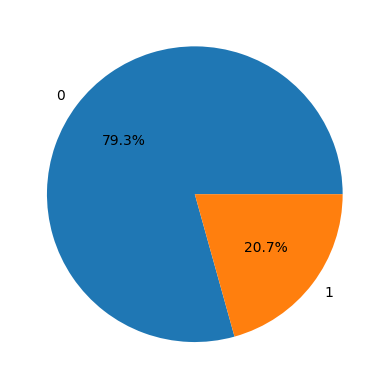

In [34]:
#시각화
plt.pie(df['Economy_status_Developed'].value_counts(),labels=df['Economy_status_Developed'].value_counts().index,autopct='%.1f%%')

In [46]:
#Economy_status_Developed 선진국 나라
df[['Country','Region','Economy_status_Developed','Year']].sort_values(by='Year')

,Country,Region,Economy_status_Developed,Year
744,Eritrea,Africa,0,2000
7,Hungary,European Union,1,2000
1789,North Macedonia,Rest of Europe,0,2000
2402,Belgium,European Union,1,2000
2823,Czechia,European Union,1,2000
...,...,...,...,...
1,Spain,European Union,1,2015
6,Russian Federation,Rest of Europe,0,2015
2848,Bahrain,Middle East,0,2015
27,Cameroon,Africa,0,2015


In [38]:
df.groupby('Economy_status_Developed').agg({'Polio':'mean','Diphtheria':'mean','Hepatitis_B':'mean'})

,Polio,Diphtheria,Hepatitis_B
Economy_status_Developed,,,
0,84.319542,83.977113,83.365757
1,94.866554,95.077703,87.849662


선진국은 예방접종이 잘 되어 있는 것 같음

<Axes: title={'center': 'Polio'}, xlabel='Region', ylabel='Polio'>

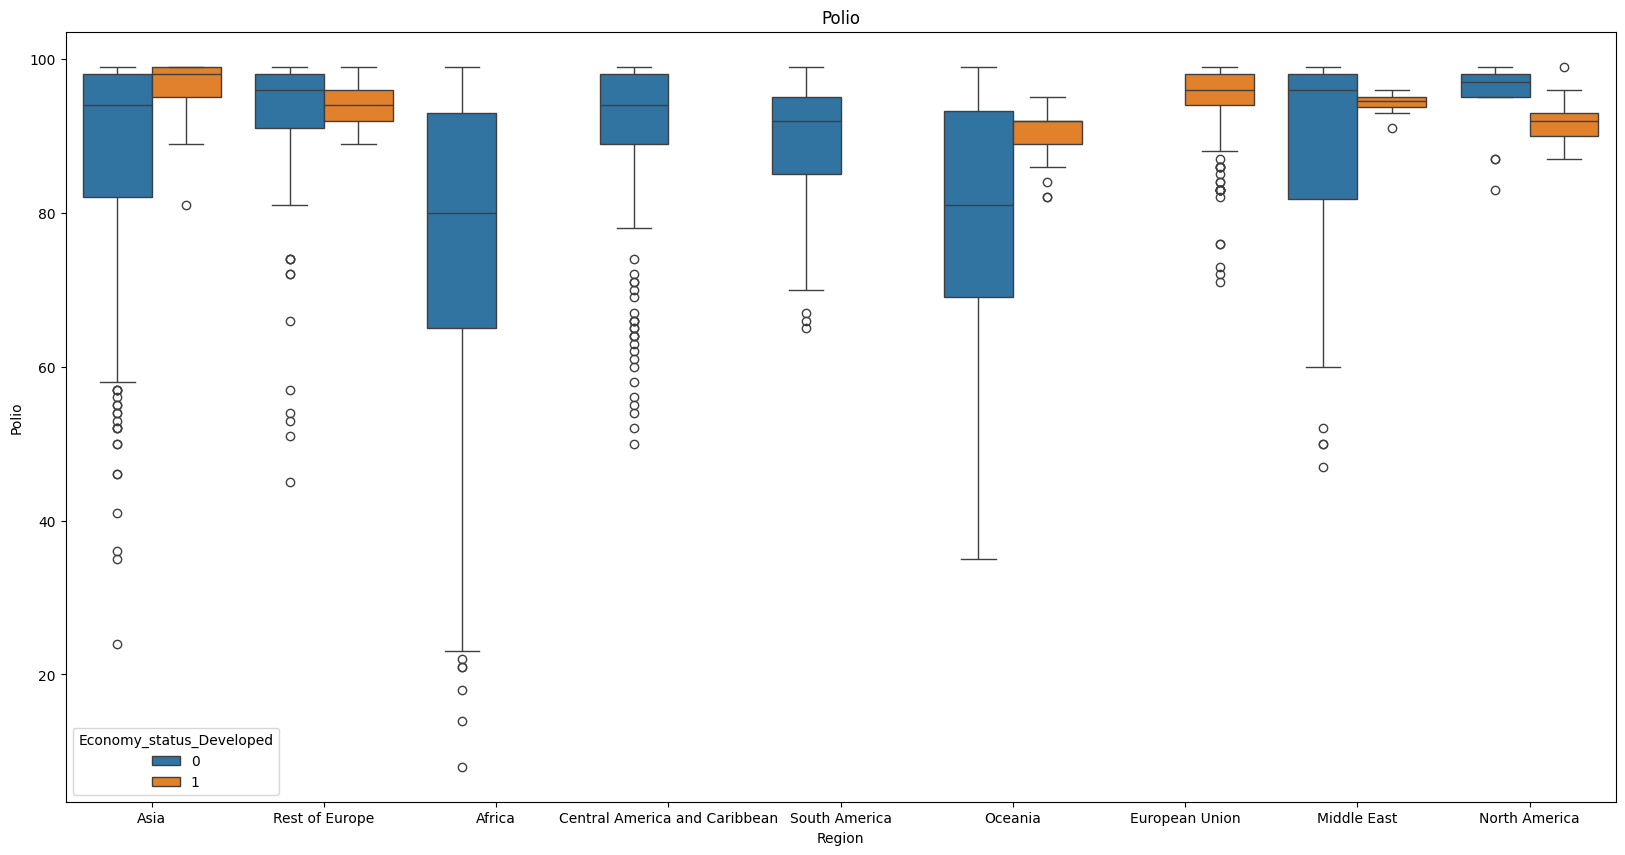

In [186]:
plt.figure(figsize=(20,10))
plt.title("Polio")
sns.boxplot(data=df,x='Region',y='Polio',hue='Economy_status_Developed')

<Axes: title={'center': 'Diphtheria'}, xlabel='Region', ylabel='Diphtheria'>

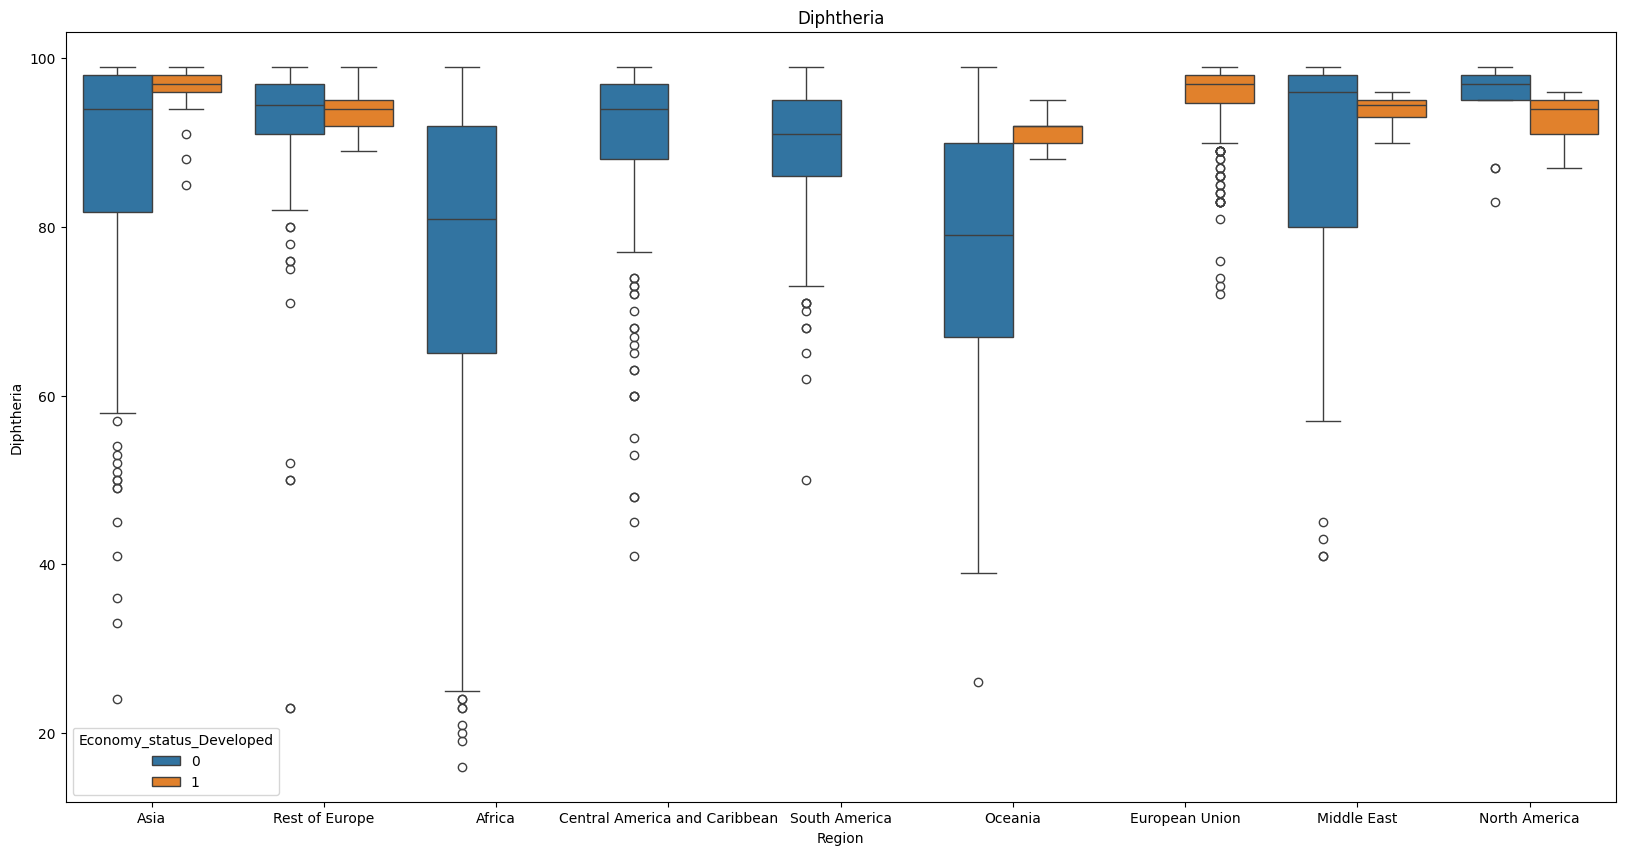

In [189]:
plt.figure(figsize=(20,10))
plt.title("Diphtheria")
sns.boxplot(data=df,x='Region',y='Diphtheria',hue='Economy_status_Developed')

<Axes: title={'center': 'Hepatitis_B'}, xlabel='Region', ylabel='Hepatitis_B'>

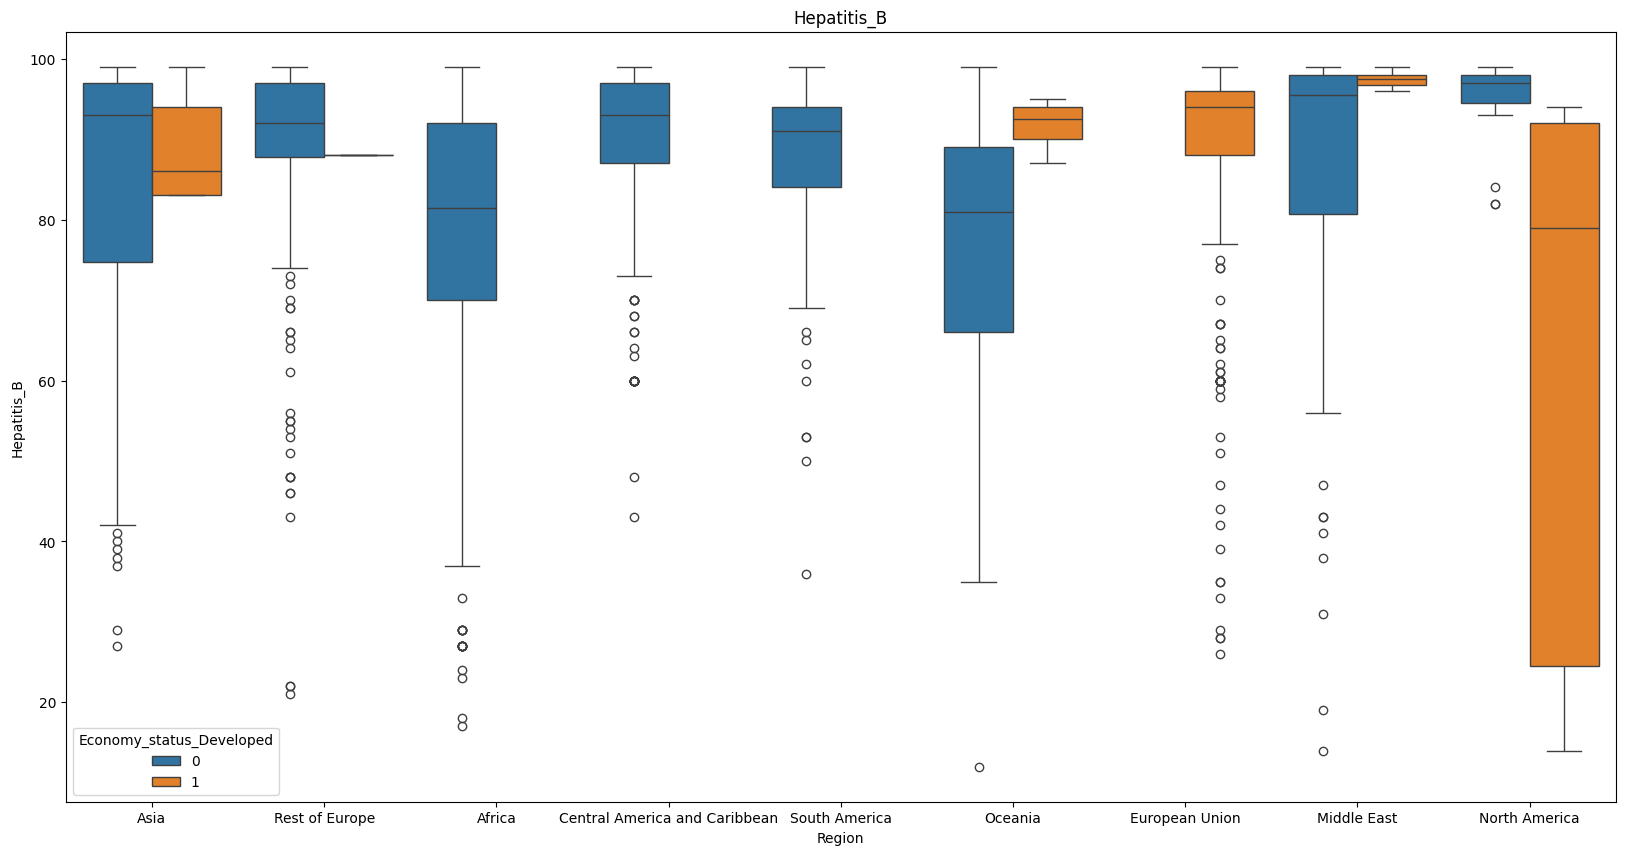

In [191]:
plt.figure(figsize=(20,10))
plt.title("Hepatitis_B")
sns.boxplot(data=df,x='Region',y='Hepatitis_B',hue='Economy_status_Developed')

사망자 수

In [29]:
df[['Infant_deaths','Under_five_deaths','Adult_mortality','Life_expectancy']].corr()['Life_expectancy']

,Life_expectancy
Infant_deaths,-0.920032
Under_five_deaths,-0.920419
Adult_mortality,-0.945360
Life_expectancy,1.000000


<Axes: >

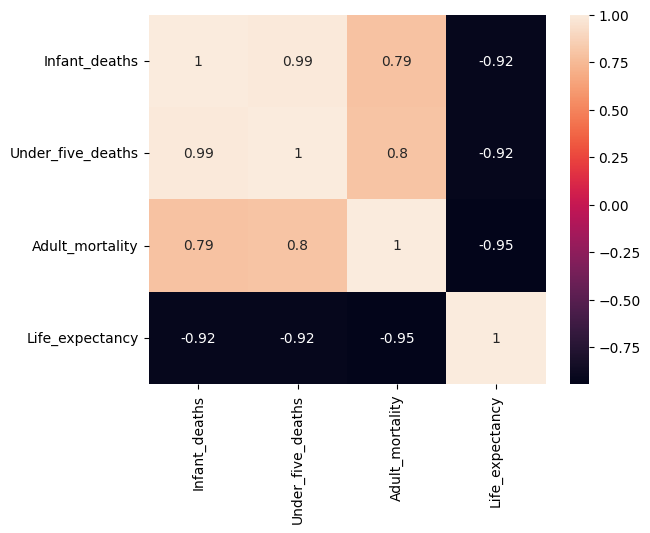

In [30]:
#시각화
sns.heatmap(df[['Infant_deaths','Under_five_deaths','Adult_mortality','Life_expectancy']].corr(),annot=True)

사망률 , 기대수명 음의 상관관계를 나타내어 사망률이 감소 할수록 기대수명이 증가한다.

In [31]:
#연도별 사망자수 조사
df.groupby('Year').agg({'Infant_deaths':'mean','Under_five_deaths':'mean','Adult_mortality':'mean'})

,Infant_deaths,Under_five_deaths,Adult_mortality
Year,,,
2000,38.997207,57.015642,217.693450
2001,37.632402,54.858101,216.753321
2002,36.281006,52.692737,215.759645
2003,34.984916,50.598883,211.633478
2004,33.776536,48.709497,207.448028
2005,32.499441,46.618436,203.649749
2006,31.319553,44.696648,199.528285
2007,30.262570,42.880447,195.409966
2008,29.333520,41.317877,190.803089


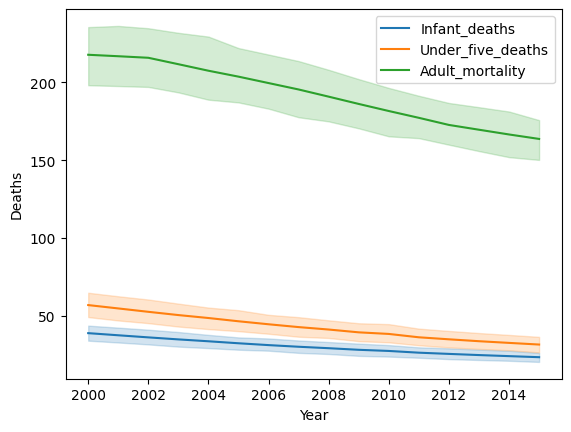

In [32]:
sns.lineplot(data=df,x='Year',y='Infant_deaths',label='Infant_deaths')
sns.lineplot(data=df,x='Year',y='Under_five_deaths',label='Under_five_deaths')
sns.lineplot(data=df,x='Year',y='Adult_mortality',label='Adult_mortality')
plt.ylabel('Deaths')
plt.show()

연도가 지날수록 사망자수가 감소하고 있음

In [33]:
#지역별 사망자수 조사
df.groupby('Region').agg({'Infant_deaths':'mean','Under_five_deaths':'mean','Adult_mortality':'mean'})

,Infant_deaths,Under_five_deaths,Adult_mortality
Region,,,
Africa,60.604044,94.025000,319.073434
Asia,32.536111,40.965278,171.166565
Central America and Caribbean,20.965461,25.932237,163.581169
European Union,4.872222,5.858333,104.395392
Middle East,16.639286,20.457143,111.158891
North America,9.925000,11.647917,100.693844
Oceania,26.305114,32.493750,162.886801
Rest of Europe,9.627917,11.179583,138.582856
South America,19.953646,23.938021,155.275326


<Axes: title={'center': 'Infant_deaths'}, xlabel='Region', ylabel='Infant_deaths'>

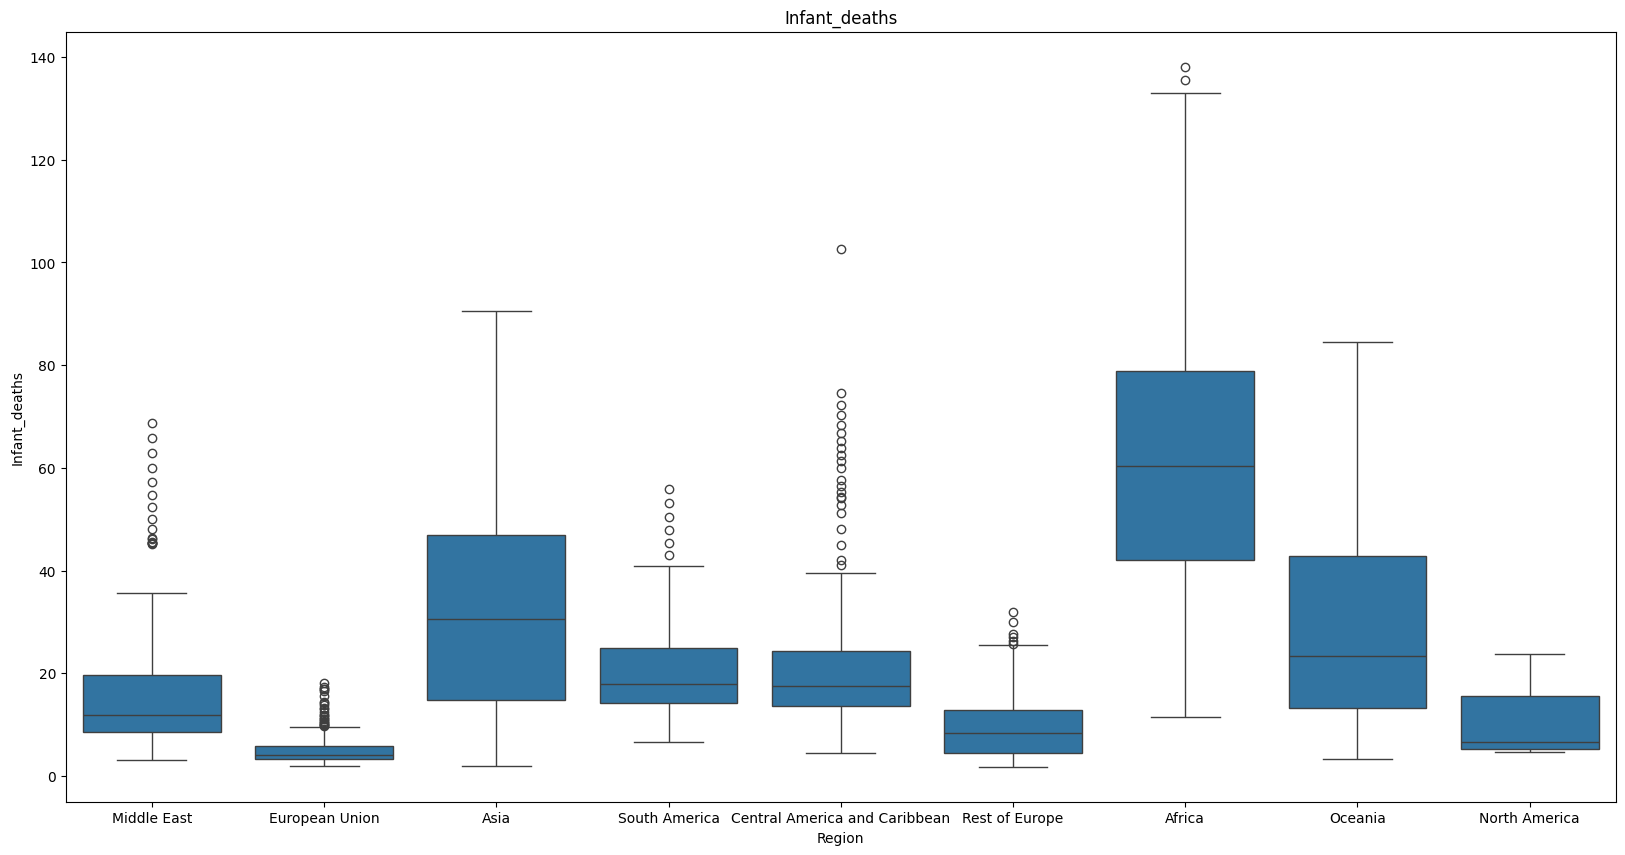

In [34]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Infant_deaths")
sns.boxplot(data=df[['Country','Region','Infant_deaths']],x='Region',y='Infant_deaths')

<Axes: title={'center': 'Under_five_deaths'}, xlabel='Region', ylabel='Under_five_deaths'>

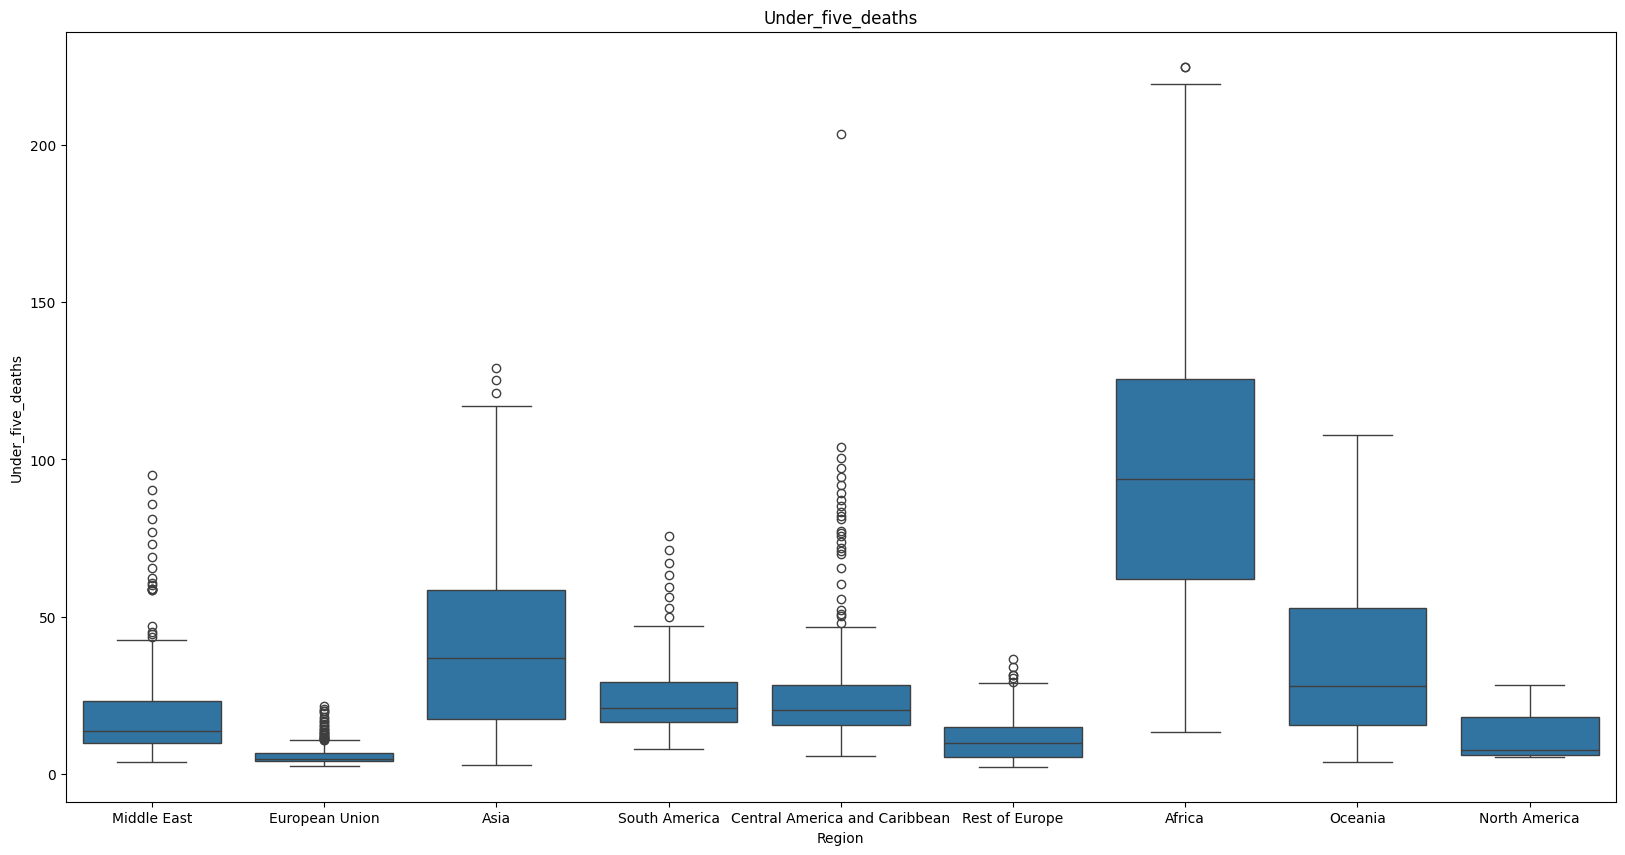

In [36]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Under_five_deaths")
sns.boxplot(data=df[['Country','Region','Under_five_deaths']],x='Region',y='Under_five_deaths')

<Axes: title={'center': 'Adult_mortality'}, xlabel='Region', ylabel='Adult_mortality'>

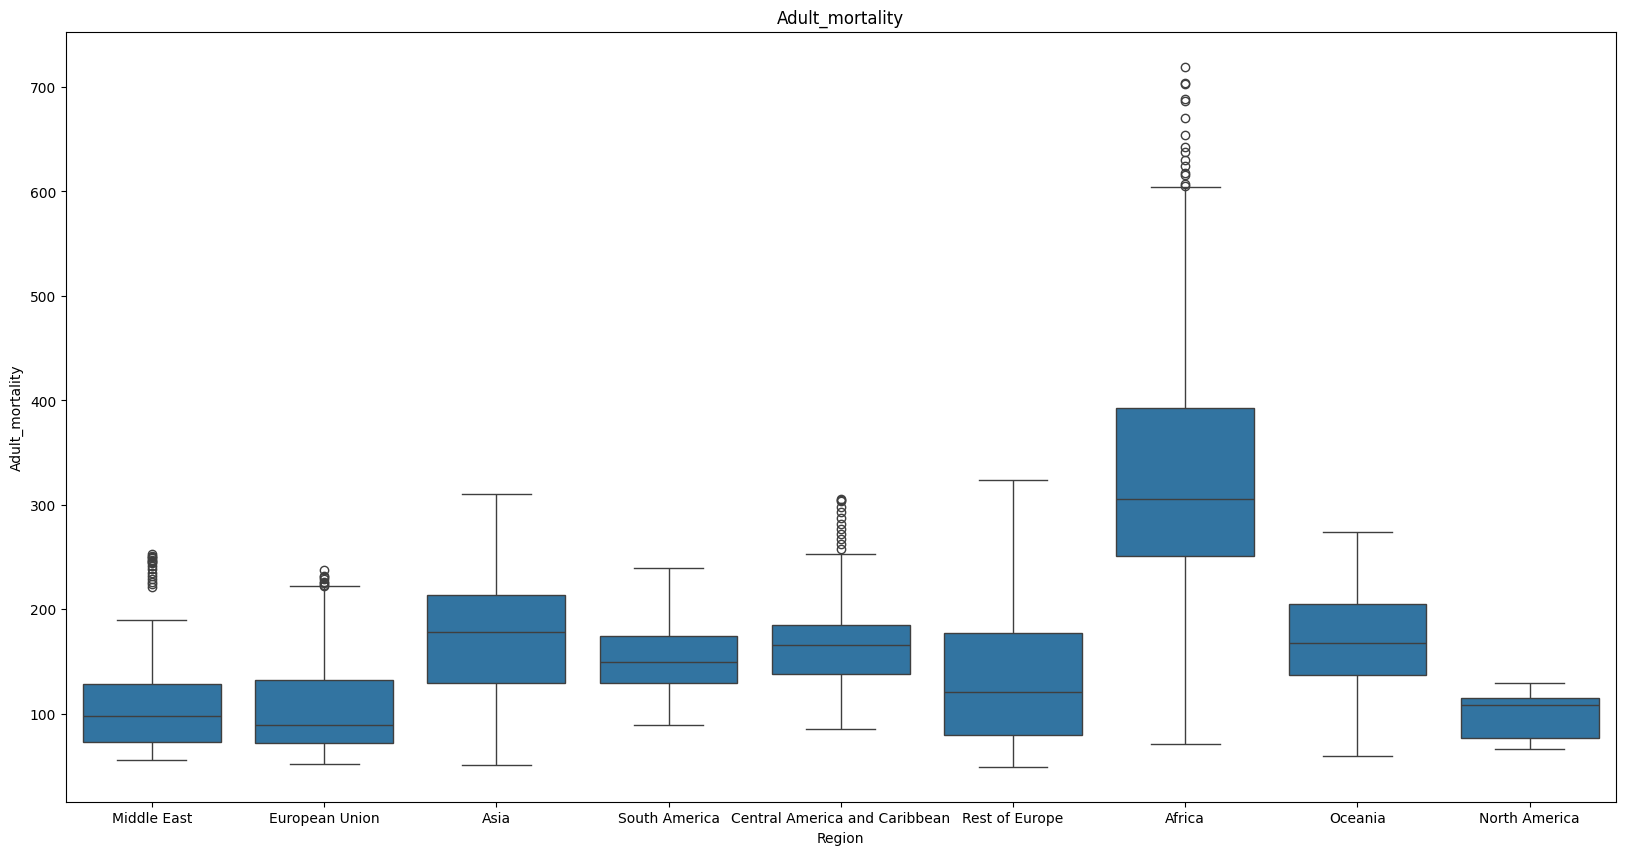

In [37]:
#시각화
plt.figure(figsize=(20,10))
plt.title("Adult_mortality")
sns.boxplot(data=df[['Country','Region','Adult_mortality']],x='Region',y='Adult_mortality')

In [42]:
#지역 년도 기대수명
df.pivot_table(index='Region',columns='Year',values='Infant_deaths',aggfunc='mean')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
Africa,76.449020,74.145098,71.772549,69.441176,67.141176,64.827451,62.568627,60.629412,58.821569,56.898039,55.039216,53.347059,51.762745,50.249020,48.943137,47.629412
Asia,45.100000,42.974074,40.900000,38.951852,37.411111,35.377778,33.770370,32.266667,31.233333,29.611111,28.211111,27.011111,25.903704,24.877778,23.929630,23.048148
Central America and Caribbean,25.410526,24.652632,23.931579,23.273684,22.657895,22.057895,21.463158,20.905263,20.378947,19.826316,21.626316,18.826316,18.315789,17.842105,17.363158,16.915789
European Union,6.651852,6.344444,6.070370,5.822222,5.559259,5.296296,5.033333,4.796296,4.574074,4.392593,4.218519,4.081481,3.951852,3.825926,3.718519,3.618519
Middle East,21.742857,20.828571,19.957143,19.114286,18.321429,17.564286,16.871429,16.214286,15.600000,15.028571,14.571429,14.200000,14.328571,14.235714,14.021429,13.628571
North America,12.066667,11.700000,11.366667,11.066667,10.766667,10.466667,10.233333,9.966667,9.733333,9.466667,9.200000,8.966667,8.766667,8.566667,8.333333,8.133333
Oceania,30.272727,29.527273,28.881818,28.290909,27.772727,27.318182,26.881818,26.463636,26.045455,25.809091,25.136364,24.663636,24.172727,23.700000,23.227273,22.718182
Rest of Europe,14.273333,13.500000,12.733333,12.006667,11.313333,10.633333,10.000000,9.400000,8.880000,8.380000,7.946667,7.540000,7.233333,6.966667,6.740000,6.500000
South America,26.150000,25.066667,24.066667,23.133333,22.258333,21.383333,20.591667,19.833333,19.125000,18.466667,17.875000,17.283333,16.741667,16.225000,15.733333,15.325000


In [43]:
#지역 년도 기대수명
df.pivot_table(index='Region',columns='Year',values='Under_five_deaths',aggfunc='mean')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
Africa,124.023529,119.901961,115.578431,111.296078,107.100000,102.907843,98.698039,94.674510,90.815686,86.823529,83.009804,79.656863,76.433333,73.529412,71.141176,68.809804
Asia,58.559259,55.466667,52.477778,49.666667,47.914815,44.651852,42.422222,40.348148,39.477778,36.914815,34.859259,33.266667,31.788889,30.433333,29.177778,28.018519
Central America and Caribbean,32.173684,31.057895,29.994737,29.010526,28.063158,27.178947,26.342105,25.542105,24.778947,24.042105,29.873684,22.626316,21.978947,21.352632,20.747368,20.152632
European Union,8.011111,7.644444,7.314815,7.003704,6.692593,6.366667,6.040741,5.755556,5.500000,5.277778,5.074074,4.903704,4.733333,4.596296,4.466667,4.351852
Middle East,26.942857,25.714286,24.550000,23.450000,22.378571,21.407143,20.457143,19.607143,18.814286,18.114286,17.542857,17.128571,17.942857,18.092857,17.864286,17.307143
North America,14.333333,13.866667,13.466667,13.066667,12.700000,12.333333,12.000000,11.666667,11.366667,11.066667,10.733333,10.466667,10.200000,9.933333,9.700000,9.466667
Oceania,38.000000,36.972727,36.036364,35.200000,34.463636,33.827273,33.245455,32.681818,32.109091,32.063636,30.854545,30.181818,29.545455,28.900000,28.236364,27.581818
Rest of Europe,16.666667,15.720000,14.806667,13.940000,13.133333,12.320000,11.573333,10.893333,10.286667,9.713333,9.220000,8.753333,8.380000,8.080000,7.813333,7.573333
South America,31.975000,30.533333,29.216667,28.000000,26.816667,25.741667,24.700000,23.725000,22.841667,21.991667,21.250000,20.516667,19.833333,19.200000,18.591667,18.075000


In [44]:
#지역 년도 기대수명
df.pivot_table(index='Region',columns='Year',values='Adult_mortality',aggfunc='mean')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
Africa,362.250010,364.498676,366.747324,358.579284,350.411206,342.243196,334.075118,325.907137,316.794853,307.682598,298.570324,289.458020,280.345755,274.774824,269.203804,263.632824
Asia,196.315463,192.648167,188.988056,185.665685,182.285556,178.950389,175.538407,172.157556,168.998556,165.844278,162.693056,159.654019,156.319204,153.601167,150.874759,148.130722
Central America and Caribbean,179.750605,178.084395,176.418263,173.891684,171.365184,168.838711,166.312316,163.785789,161.734395,159.682974,157.631658,155.580289,153.528842,151.880026,150.231211,148.582368
European Union,121.119648,120.019870,117.487296,115.215463,112.515111,111.582019,110.590500,109.011722,104.690204,101.037741,97.646444,94.878463,92.242759,89.603056,87.015741,85.670241
Middle East,124.100179,121.753214,119.598536,117.748500,115.973321,114.355464,112.616393,110.919179,109.709857,108.418179,107.167036,106.031929,104.790786,103.337143,101.761571,100.260964
North America,108.095167,107.182000,106.124167,105.539333,103.751000,103.641333,102.475333,101.432833,100.334000,99.094667,97.076667,96.392667,95.669167,94.801167,94.763000,94.729000
Oceania,188.819409,184.891818,181.469273,177.429500,173.147136,169.150091,165.088818,161.408318,158.756409,156.427455,153.722227,151.472409,148.752455,146.886955,145.283591,143.482955
Rest of Europe,154.208800,152.988133,153.173600,151.633833,150.610600,150.253667,146.655000,143.751767,140.627033,135.295967,131.581267,127.787333,122.456867,120.595200,118.753033,116.953600
South America,171.211167,169.087375,166.963625,164.648917,162.334333,160.019583,157.705000,155.390375,153.499958,151.609375,149.719000,147.828542,145.937875,144.377375,142.816625,141.256083


In [66]:
#지역 년도 기대수명
df.pivot_table(index='Region',columns='Year',values=['Life_expectancy'],aggfunc='mean')

Life_expectancy                        \
Year                                     2000       2001       2002   
Region                                                                
Africa                              54.137255  54.358824  54.594118   
Asia                                66.648148  67.048148  67.440741   
Central America and Caribbean       70.847368  71.094737  71.310526   
European Union                      75.740741  76.092593  76.237037   
Middle East                         72.307143  72.600000  72.857143   
North America                       76.666667  76.933333  77.100000   
Oceania                             67.518182  67.809091  68.109091   
Rest of Europe                      72.813333  73.080000  73.140000   
South America                       70.808333  71.100000  71.383333   

                                                                           \
Year                                2003       2004       2005       2006   
Region                                                                      
Africa                         54.964706  55.450980  55.956863  56.570588   
Asia                           67.833333  68.233333  68.596296  68.955556   
Central America and Caribbean  71.542105  71.742105  71.957895  72.157895   
European Union                 76.366667  76.870370  76.974074  77.251852   
Middle East                    73.114286  73.364286  73.585714  73.828571   
North America                  77.266667  77.533333  77.666667  77.766667   
Oceania                        68.418182  68.700000  69.018182  69.263636   
Rest of Europe                 73.320000  73.586667  73.726667  73.966667   
South America                  71.650000  71.941667  72.216667  72.475000   

                                                                           \
Year                                2007       2008       2009       2010   
Region                                                                      
Africa                         57.243137  57.933333  58.627451  59.331373   
Asia                           69.325926  69.711111  70.125926  70.433333   
Central America and Caribbean  72.357895  72.568421  72.763158  72.952632   
European Union                 77.422222  77.777778  78.081481  78.400000   
Middle East                    73.985714  74.192857  74.378571  74.535714   
North America                  77.933333  77.966667  78.166667  78.266667   
Oceania                        69.527273  69.754545  69.990909  70.200000   
Rest of Europe                 74.246667  74.533333  74.793333  75.153333   
South America                  72.733333  72.991667  73.241667  73.483333   

                                                                           \
Year                                2011       2012       2013       2014   
Region                                                                      
Africa                         59.998039  60.701961  61.309804  61.911765   
Asia                           70.737037  71.088889  71.403704  71.714815   
Central America and Caribbean  73.168421  73.347368  73.547368  73.726316   
European Union                 78.874074  78.937037  79.288889  79.614815   
Middle East                    74.685714  74.807143  74.978571  75.114286   
North America                  78.333333  78.433333  78.433333  78.500000   
Oceania                        70.400000  70.600000  70.818182  70.981818   
Rest of Europe                 75.513333  75.806667  76.053333  76.293333   
South America                  73.700000  73.916667  74.108333  74.275000   

                                          
Year                                2015  
Region                                    
Africa                         62.466667  
Asia                           71.981481  
Central America and Caribbean  73.915789  
European Union                 79.511111  
Middle East                    75.271429  
North America                  78.500000  
Oceania        

In [67]:
df.groupby('Economy_status_Developed').agg({'Infant_deaths':'mean','Under_five_deaths':'mean','Adult_mortality':'mean'})

,Infant_deaths,Under_five_deaths,Adult_mortality
Economy_status_Developed,,,
0,37.051849,52.654269,217.432966
1,4.696115,5.649831,95.610448


<Axes: xlabel='Region', ylabel='Infant_deaths'>

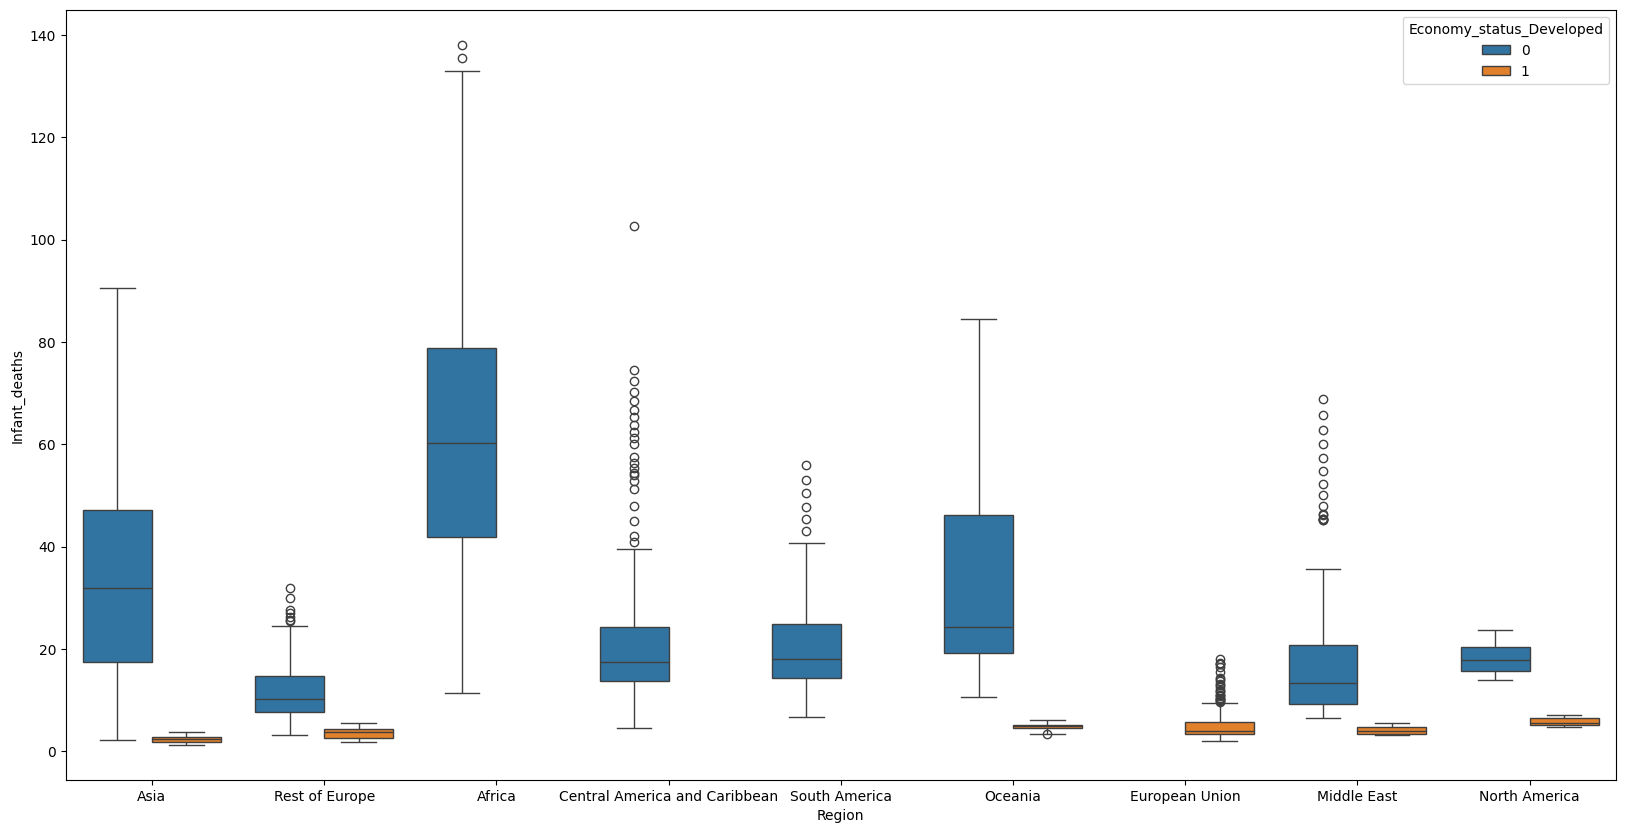

In [192]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Infant_deaths',hue='Economy_status_Developed')

<Axes: xlabel='Region', ylabel='Under_five_deaths'>

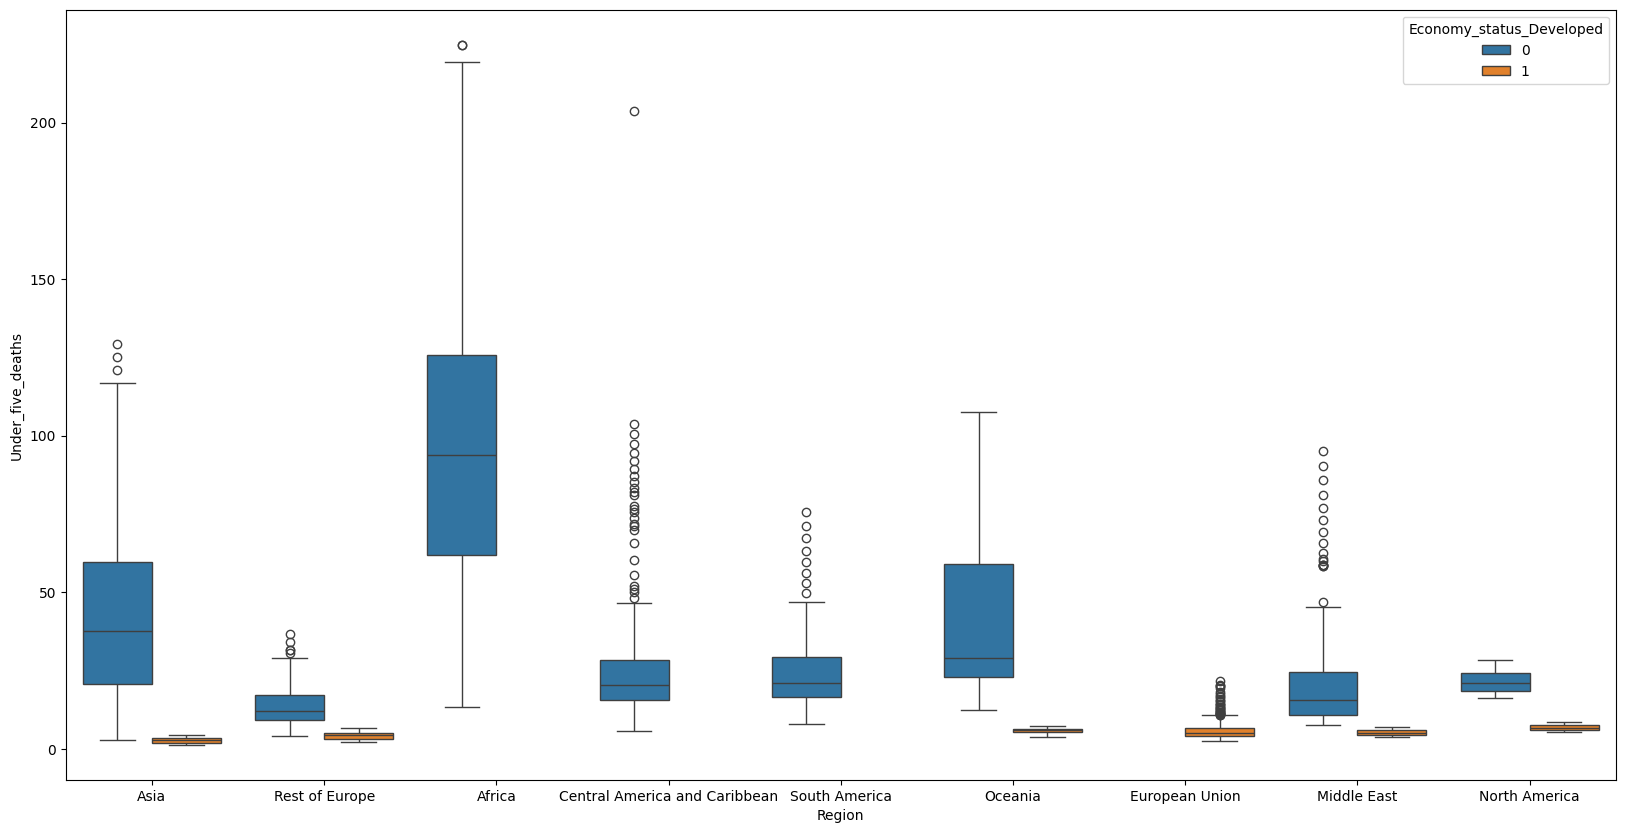

In [193]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Under_five_deaths',hue='Economy_status_Developed')

<Axes: xlabel='Region', ylabel='Adult_mortality'>

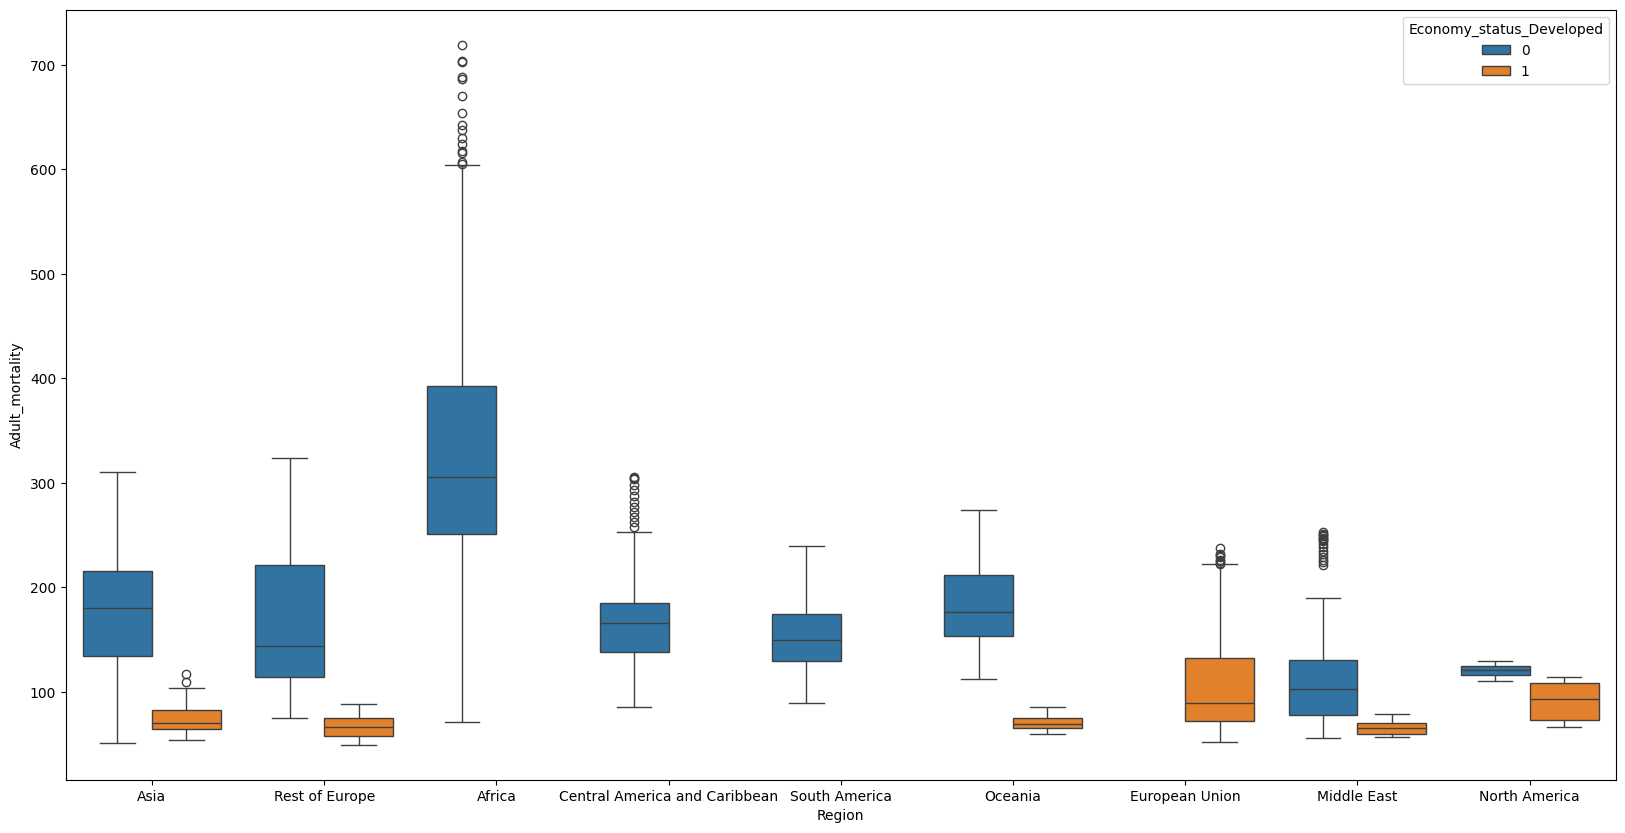

In [194]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Adult_mortality',hue='Economy_status_Developed')

개발도상국이 사망자수가 낮다

In [72]:
df[df['Economy_status_Developed']==1].groupby('Region').agg({'Life_expectancy':'mean'}).reset_index().sort_values(by='Life_expectancy',ascending=False)

,Region,Life_expectancy
0,Asia,82.456250
5,Rest of Europe,80.835938
2,Middle East,80.793750
4,Oceania,80.650000
3,North America,79.256250
1,European Union,77.715046


In [73]:
df[df['Economy_status_Developed']==0].groupby('Region').agg({'Life_expectancy':'mean'}).reset_index().sort_values(by='Life_expectancy',ascending=False)

,Region,Life_expectancy
4,North America,75.012500
3,Middle East,73.450962
7,South America,72.780729
2,Central America and Caribbean,72.437500
6,Rest of Europe,72.230682
1,Asia,68.954808
5,Oceania,67.043750
0,Africa,57.847304


In [40]:
#개발도상국
df.pivot_table(index='Economy_status_Developed',columns='Year',values='Adult_mortality',aggfunc='mean')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Economy_status_Developed,,,,,,,,,,,,,,,,
0,245.496144,244.730704,244.022803,239.416873,234.780849,230.252025,225.302511,220.520236,215.670271,210.491866,205.566049,200.629254,195.532165,192.154433,188.844211,185.517063
1,110.991216,109.380662,107.290230,105.005311,102.549095,101.554527,100.610986,99.040824,95.366878,92.604081,89.560419,87.350851,84.831081,82.923176,80.895081,79.812757


음주

In [55]:
#음주량 측정
df[['Alcohol_consumption','Adult_mortality','Life_expectancy']].corr()['Life_expectancy']

,Life_expectancy
Alcohol_consumption,0.399159
Adult_mortality,-0.945360
Life_expectancy,1.000000


<Axes: >

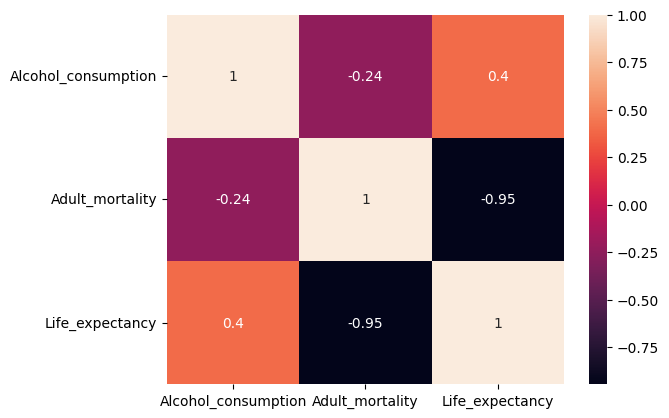

In [56]:
sns.heatmap(df[['Alcohol_consumption','Adult_mortality','Life_expectancy']].corr(),annot=True)

In [62]:
df.pivot_table(index='Region',columns='Year',values='Alcohol_consumption',aggfunc='mean')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,
Africa,3.057529,3.056608,3.025725,2.909647,2.855922,2.934804,3.019257,3.062849,2.951157,2.908392,2.921176,3.009412,3.004314,2.953725,3.028235,2.992353
Asia,2.146185,2.032926,2.017444,2.063222,2.090148,2.205719,2.209444,2.381000,2.448815,2.345259,2.602593,2.631481,2.723333,2.901111,2.835185,2.793333
Central America and Caribbean,5.600526,5.586316,5.752105,5.823158,5.561053,5.701579,5.788421,5.772105,5.835263,5.535263,5.407895,5.430526,5.466316,5.510000,5.566842,5.634211
European Union,10.769630,10.896296,10.972593,10.923333,11.144815,11.043704,11.274444,11.401481,11.152593,10.633704,10.469259,10.510741,10.490370,10.287037,10.337407,10.353704
Middle East,0.924214,0.954571,0.928500,0.908143,0.895643,0.961214,0.921071,0.918143,0.918429,0.913071,0.877143,0.840714,0.815714,0.792857,0.786429,0.790714
North America,7.020000,6.956667,6.983333,7.036667,7.093333,7.193333,7.343333,7.093333,7.136667,7.146667,7.003333,6.953333,7.003333,6.940000,6.940000,7.006667
Oceania,2.833636,2.861818,2.940000,3.053636,2.908182,2.986364,2.920818,2.953273,2.979273,2.875000,2.934545,2.872727,2.859091,2.716364,2.710909,2.678182
Rest of Europe,7.244000,7.145333,7.198667,7.281333,7.496000,7.878667,7.813333,8.129333,8.334000,7.921333,7.805333,7.897333,7.697333,7.503333,7.071333,6.864667
South America,5.744167,5.677500,5.524167,5.470833,5.663333,5.638333,5.747500,5.894167,5.998333,5.928333,5.845000,5.751667,5.917500,5.781667,5.736667,5.611667


<Axes: xlabel='Year', ylabel='Alcohol_consumption'>

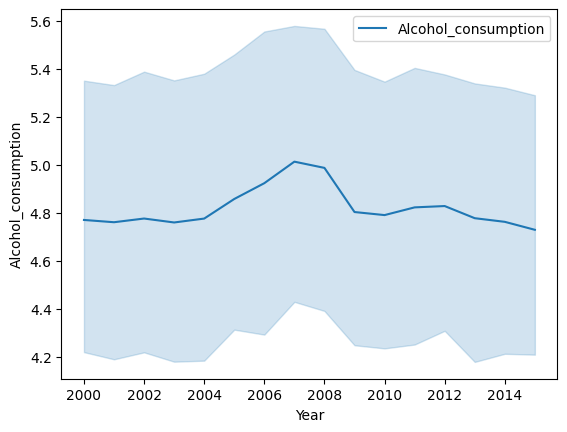

In [63]:
sns.lineplot(data=df,x='Year',y='Alcohol_consumption',label='Alcohol_consumption')

<Axes: xlabel='Region', ylabel='Alcohol_consumption'>

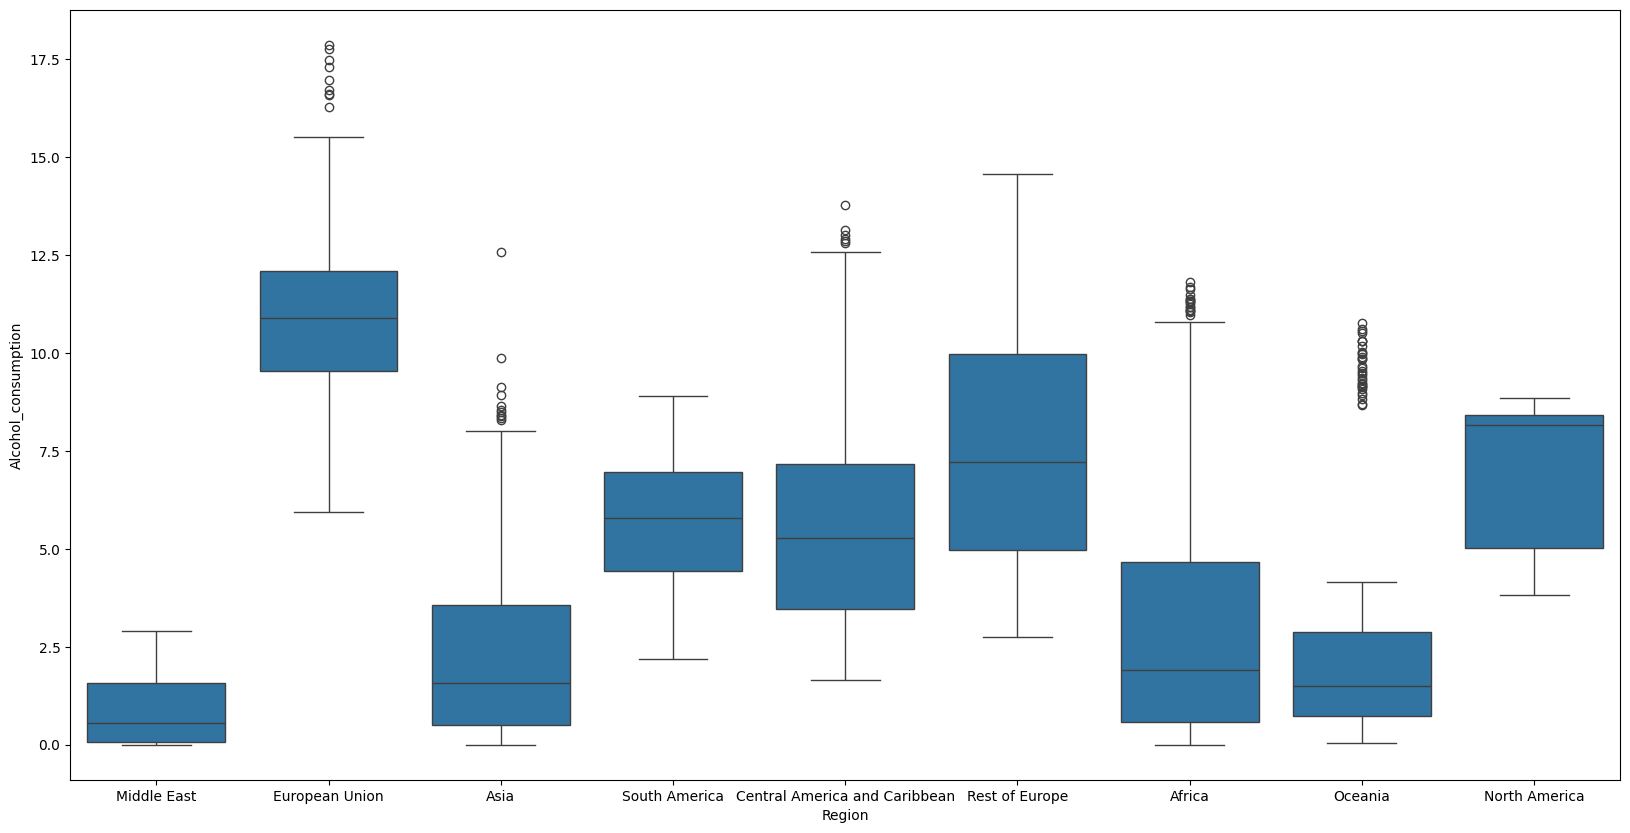

In [65]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Region',y='Alcohol_consumption')

알콜 소비량은 기대수명에 강한 관계는 아닌 것 같다.

###한국 데이터 EDA

In [198]:
#한국 데이터 읽기
korea= df[df['Country'].str.contains('Korea')]
korea_df = pd.DataFrame(korea)


In [199]:
korea_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2368 to 2383
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      16 non-null     object 
 1   Region                       16 non-null     object 
 2   Year                         16 non-null     int64  
 3   Infant_deaths                16 non-null     float64
 4   Under_five_deaths            16 non-null     float64
 5   Adult_mortality              16 non-null     float64
 6   Alcohol_consumption          16 non-null     float64
 7   Hepatitis_B                  16 non-null     int64  
 8   Measles                      16 non-null     int64  
 9   BMI                          16 non-null     float64
 10  Polio                        16 non-null     int64  
 11  Diphtheria                   16 non-null     int64  
 12  Incidents_HIV                16 non-null     float64
 13  GDP_per_capita        

예방접종

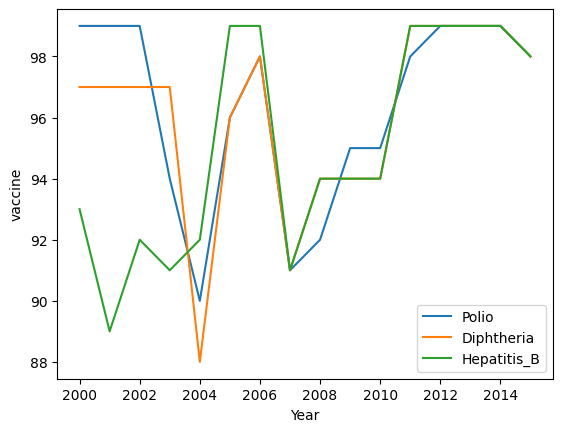

In [206]:
sns.lineplot(data=korea_df,x='Year',y='Polio',label='Polio')
sns.lineplot(data=korea_df,x='Year',y='Diphtheria',label='Diphtheria')
sns.lineplot(data=korea_df,x='Year',y='Hepatitis_B',label='Hepatitis_B')
plt.ylabel('vaccine')
plt.show()

<Axes: xlabel='Year', ylabel='Life_expectancy'>

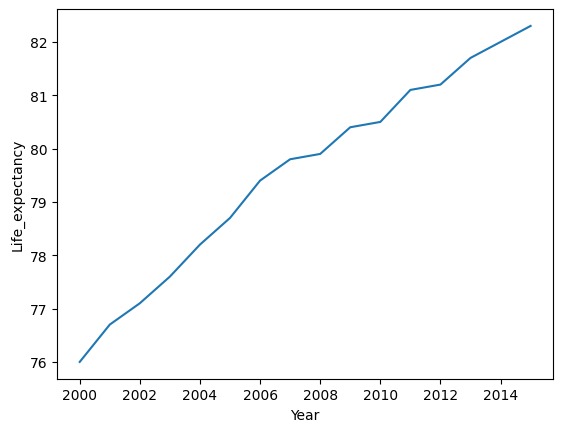

In [200]:
sns.lineplot(data=korea_df,x='Year',y='Life_expectancy')